#AIRPRDICT [AIR QUALITY PREDICTION USING CLASSIFICATION ALGORITHM]


In [53]:
#requirements
!pip install -q Gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/datasets/city_hour.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/datasets/city_hour.csv")
zip_ref.close()

In [4]:
# Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/city_hour.csv/city_hour.csv',encoding='unicode_escape')


In [5]:
df.head(100)

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3  \
0   Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN   
1   Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN   
2   Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN   
3   Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN   
4   Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN   
..        ...                  ...    ...   ...   ...    ...    ...  ...   
95  Ahmedabad  2015-01-05 00:00:00    NaN   NaN   NaN  15.45  13.62  NaN   
96  Ahmedabad  2015-01-05 01:00:00    NaN   NaN   NaN  17.19  12.48  NaN   
97  Ahmedabad  2015-01-05 02:00:00    NaN   NaN   NaN  14.36   8.52  NaN   
98  Ahmedabad  2015-01-05 03:00:00    NaN   NaN   NaN  15.55  11.87  NaN   
99  Ahmedabad  2015-01-05 04:00:00    NaN   NaN   NaN  13.49   9.27  NaN   

      CO     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0   1.00  122.07     NaN     0.00     0.00    0.00  NaN        NaN  
1   0.02   85.90     NaN     0.00     0.00    0.00  NaN        NaN  
2   0.08   52.83     NaN     0.00     0.00    0.00  NaN        NaN  
3   0.30   39.53  153.58     0.00     0.00    0.00  NaN        NaN  
4   0.12   32.63     NaN     0.00     0.00    0.00  NaN        NaN  
..   ...     ...     ...      ...      ...     ...  ...        ...  
95   NaN   24.83   42.38     3.18     7.02    0.00  NaN        NaN  
96   NaN   67.63   37.29     2.73     7.20    0.83  NaN        NaN  
97   NaN   32.67   38.21     0.62     3.37    0.00  NaN        NaN  
98   NaN   68.80   30.25     1.70     4.02    1.23  NaN        NaN  
99   NaN   53.58   32.75     1.62     2.13    0.18  NaN        NaN  

[100 rows x 16 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [6]:
# Convert string to datetime64
df['Datetime'] = pd.to_datetime(df['Datetime'])
#city_day.set_index('Date',inplace=True)

In [7]:
print(f"The available data is between {df['Datetime'].min()} and {df['Datetime'].max()}")

The available data is between 2015-01-01 01:00:00 and 2020-07-01 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        707875 non-null  object        
 1   Datetime    707875 non-null  datetime64[ns]
 2   PM2.5       562787 non-null  float64       
 3   PM10        411138 non-null  float64       
 4   NO          591243 non-null  float64       
 5   NO2         590753 non-null  float64       
 6   NOx         584651 non-null  float64       
 7   NH3         435333 non-null  float64       
 8   CO          621358 non-null  float64       
 9   SO2         577502 non-null  float64       
 10  O3          578667 non-null  float64       
 11  Benzene     544229 non-null  float64       
 12  Toluene     487268 non-null  float64       
 13  Xylene      252046 non-null  float64       
 14  AQI         578795 non-null  float64       
 15  AQI_Bucket  578795 non-null  object        
dtypes:

In [ ]:
df.describe()

Datetime          PM2.5           PM10  \
count                         707875  562787.000000  411138.000000   
mean   2018-05-14 02:41:03.445098752      67.622994     119.075804   
min              2015-01-01 01:00:00       0.010000       0.010000   
25%              2017-04-15 23:00:00      26.200000      52.380000   
50%              2018-08-04 20:00:00      46.420000      91.500000   
75%              2019-09-02 14:00:00      79.490000     147.520000   
max              2020-07-01 00:00:00     999.990000    1000.000000   
std                              NaN      74.730496     104.224752   

                  NO            NO2            NOx            NH3  \
count  591243.000000  590753.000000  584651.000000  435333.000000   
mean       17.421755      28.885157      32.287565      23.607959   
min         0.010000       0.010000       0.000000       0.010000   
25%         3.840000      10.810000      10.660000       8.120000   
50%         7.960000      20.320000      20.790000      15.380000   
75%        16.150000      36.350000      37.150000      29.230000   
max       499.990000     499.510000     498.610000     499.970000   
std        32.095211      29.162194      39.756669      28.831900   

                  CO            SO2             O3        Benzene  \
count  621358.000000  577502.000000  578667.000000  544229.000000   
mean        2.183539      14.038307      34.798979       3.087595   
min         0.000000       0.010000       0.010000       0.000000   
25%         0.420000       4.880000      13.420000       0.050000   
50%         0.800000       8.370000      26.240000       0.860000   
75%         1.370000      14.780000      47.620000       2.750000   
max       498.570000     199.960000     497.620000     498.070000   
std        10.970514      19.305540      29.806379      16.456599   

             Toluene         Xylene            AQI  
count  487268.000000  252046.000000  578795.000000  
mean        8.660927       3.130537     166.413500  
min         0.000000       0.000000       8.000000  
25%         0.370000       0.100000      79.000000  
50%         2.590000       0.790000     116.000000  
75%         8.410000       3.120000     208.000000  
max       499.400000     499.990000    3133.000000  
std        21.741023       7.834832     162.112729

In [ ]:
df['City'].value_counts().nunique()

21

In [8]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object', name='City')


In [9]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'Benzene','Xylene','NH3']

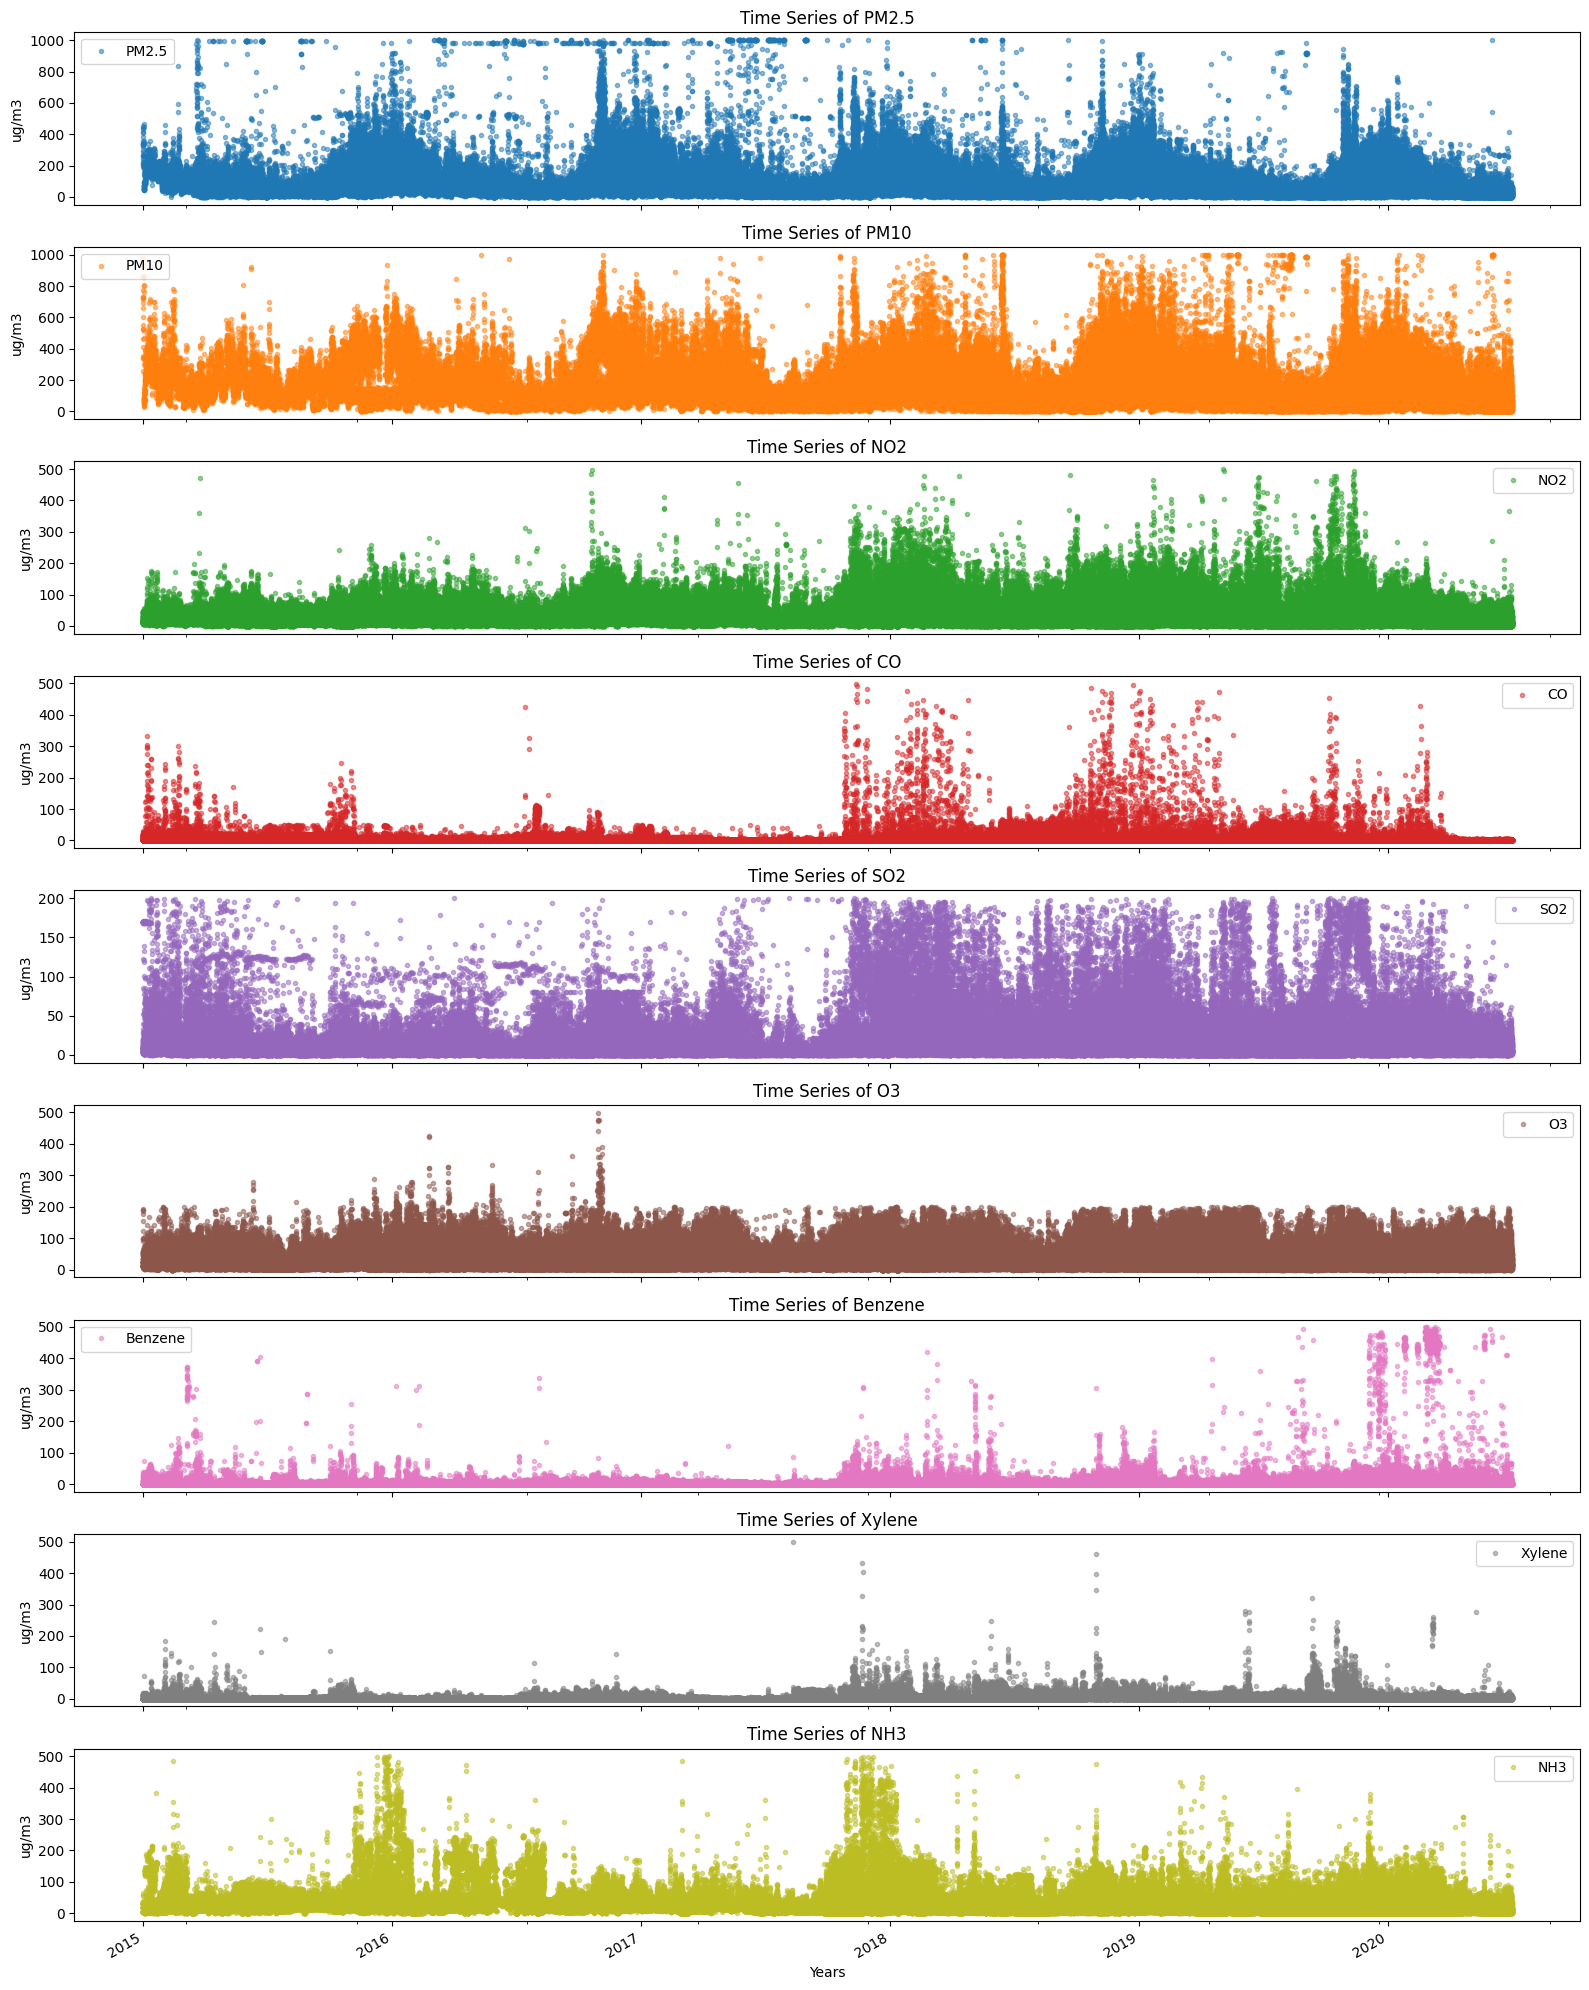

In [ ]:
import matplotlib.pyplot as plt

df.set_index('Datetime', inplace=True)
axes = df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)

# If there's only one subplot, axes is not an array, so we need to wrap it in a list
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

for ax, pollutant in zip(axes, pollutants):
    ax.set_xlabel('Years')
    ax.set_ylabel('ug/m3')
    ax.set_title(f'Time Series of {pollutant}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


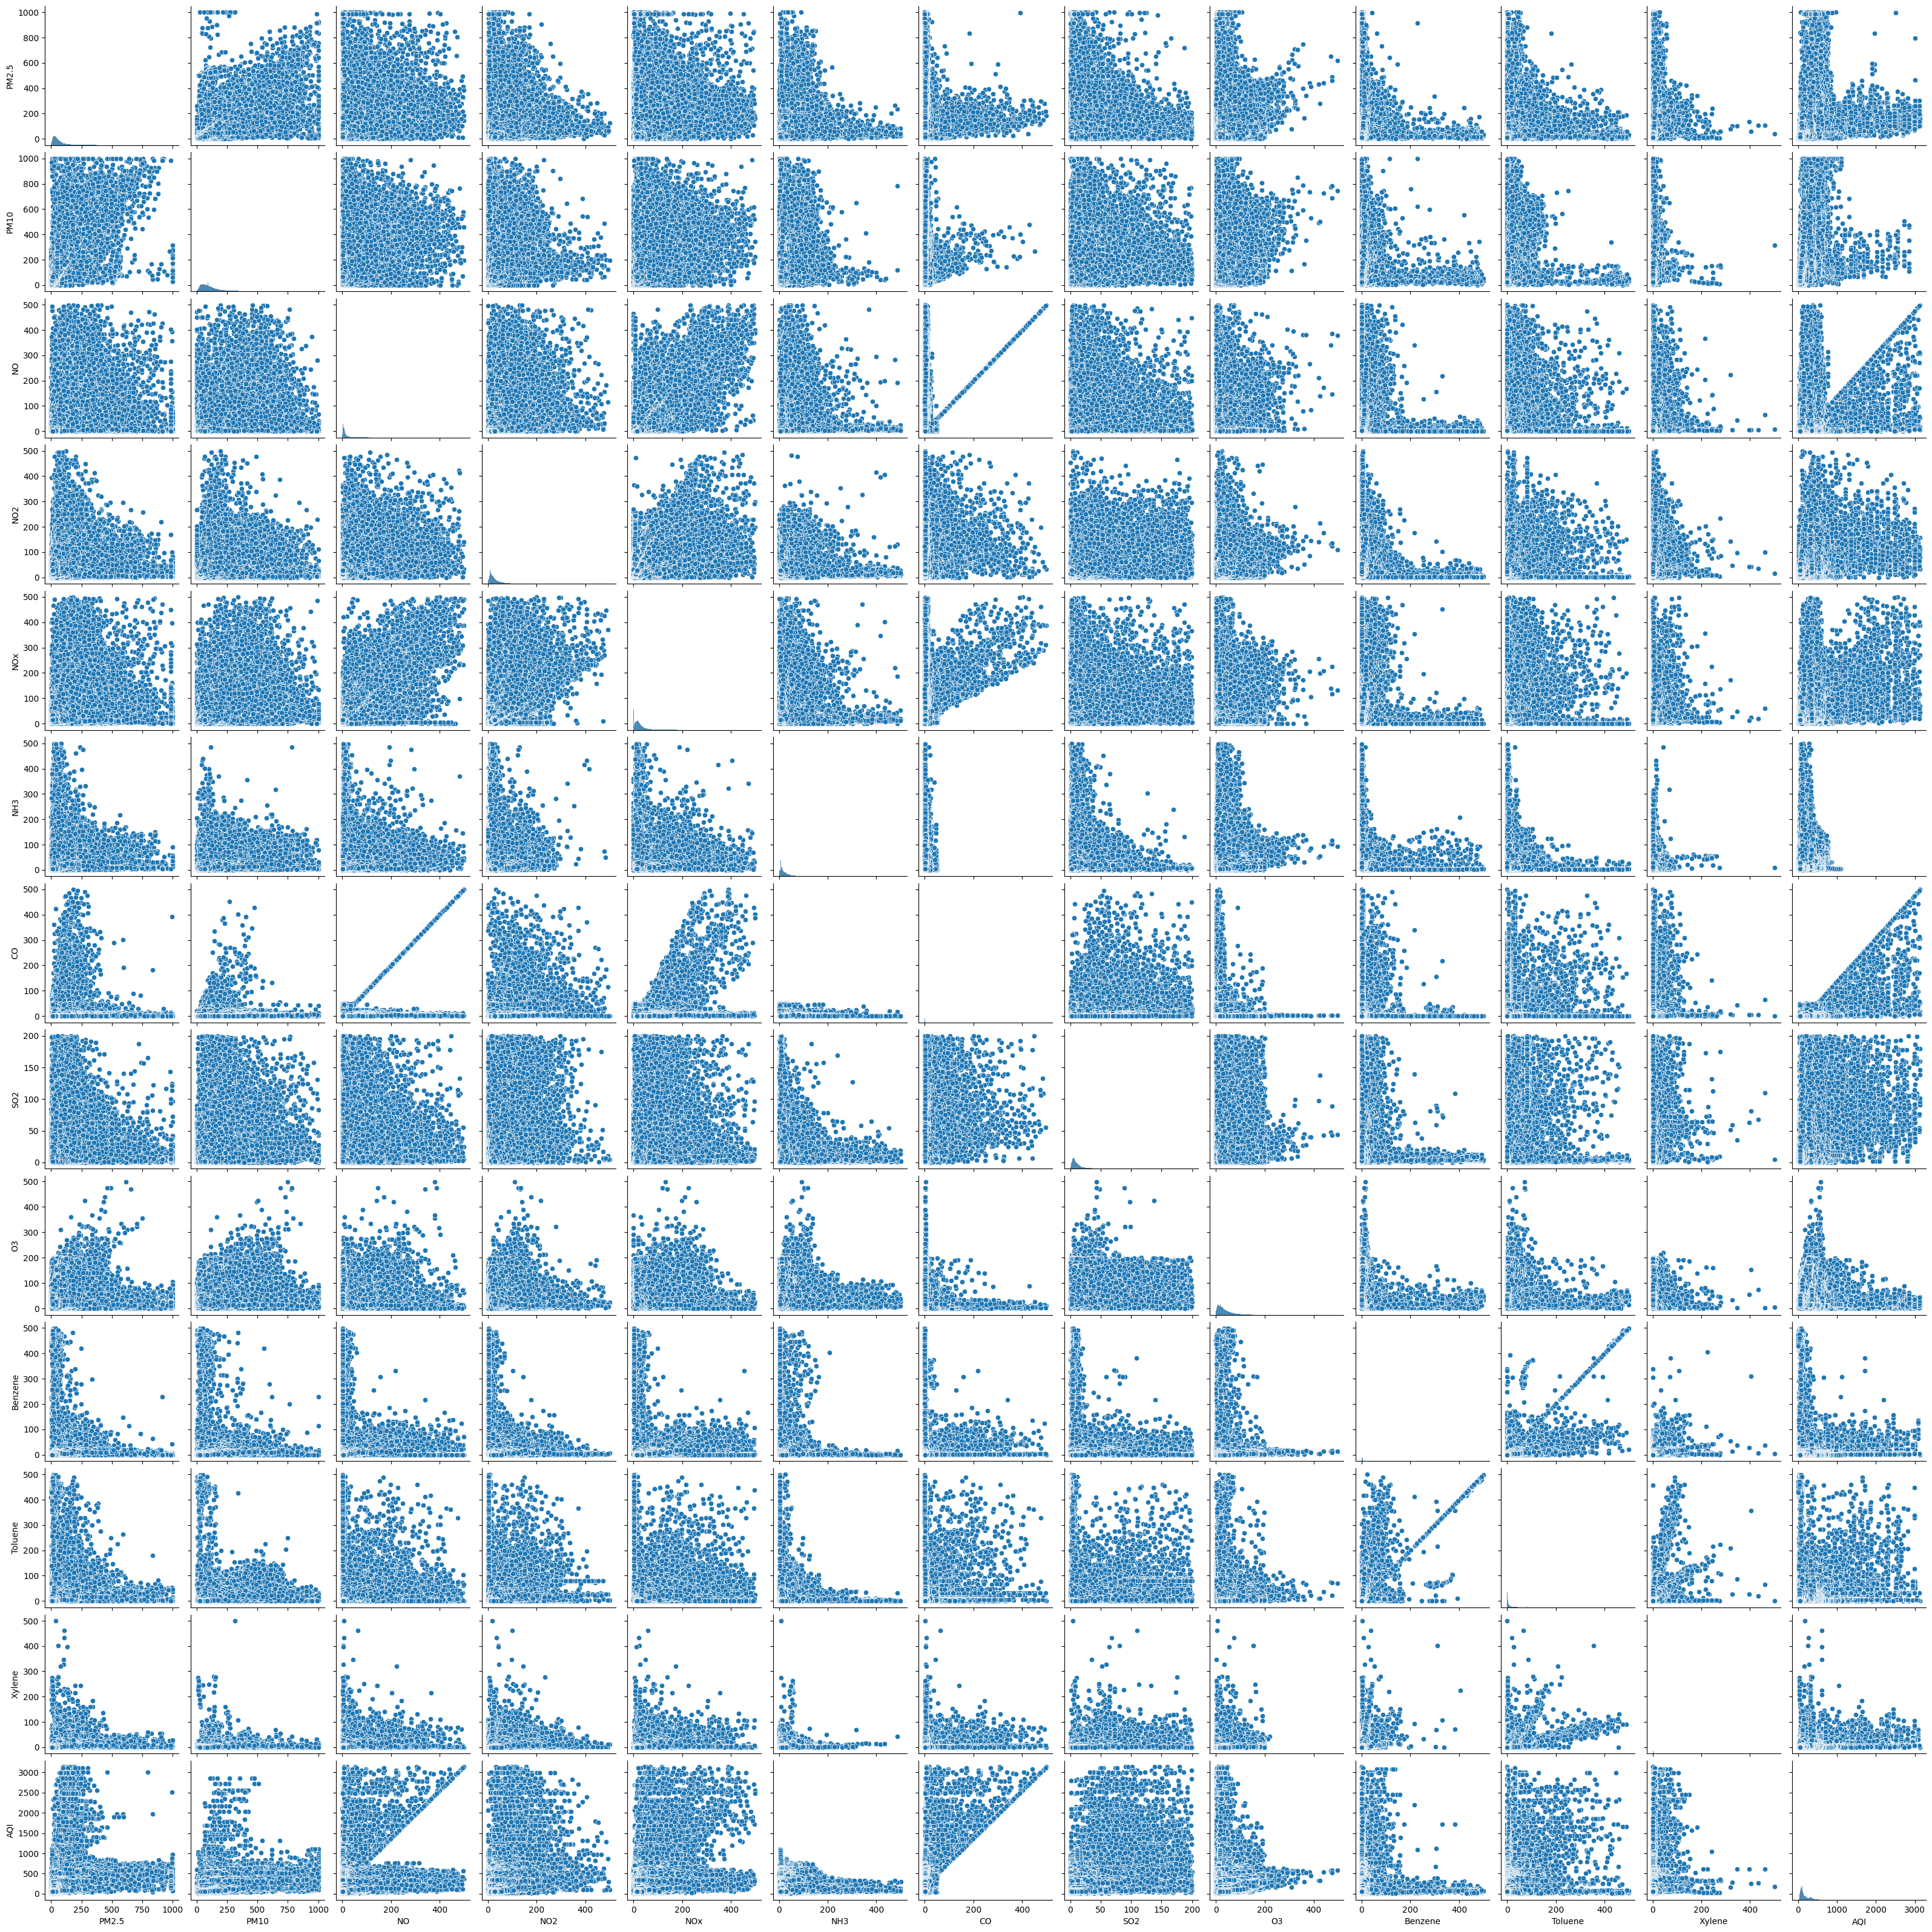

In [ ]:
sns.pairplot(data=df)

[]

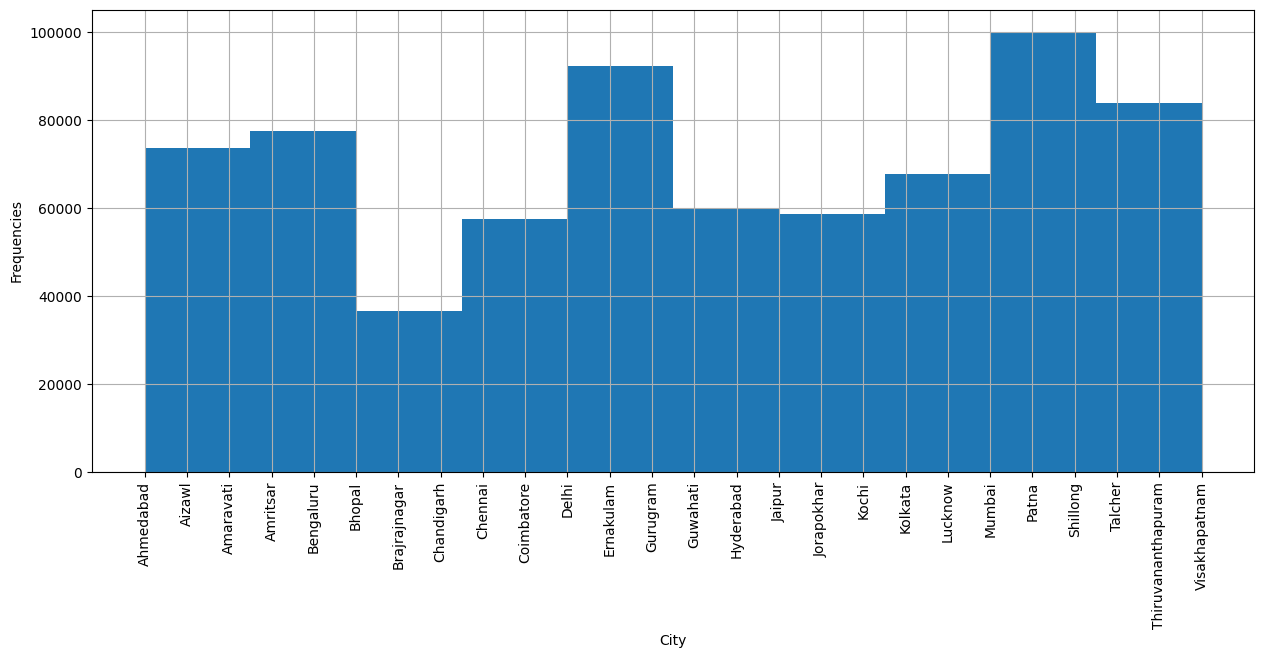

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.City.hist()
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

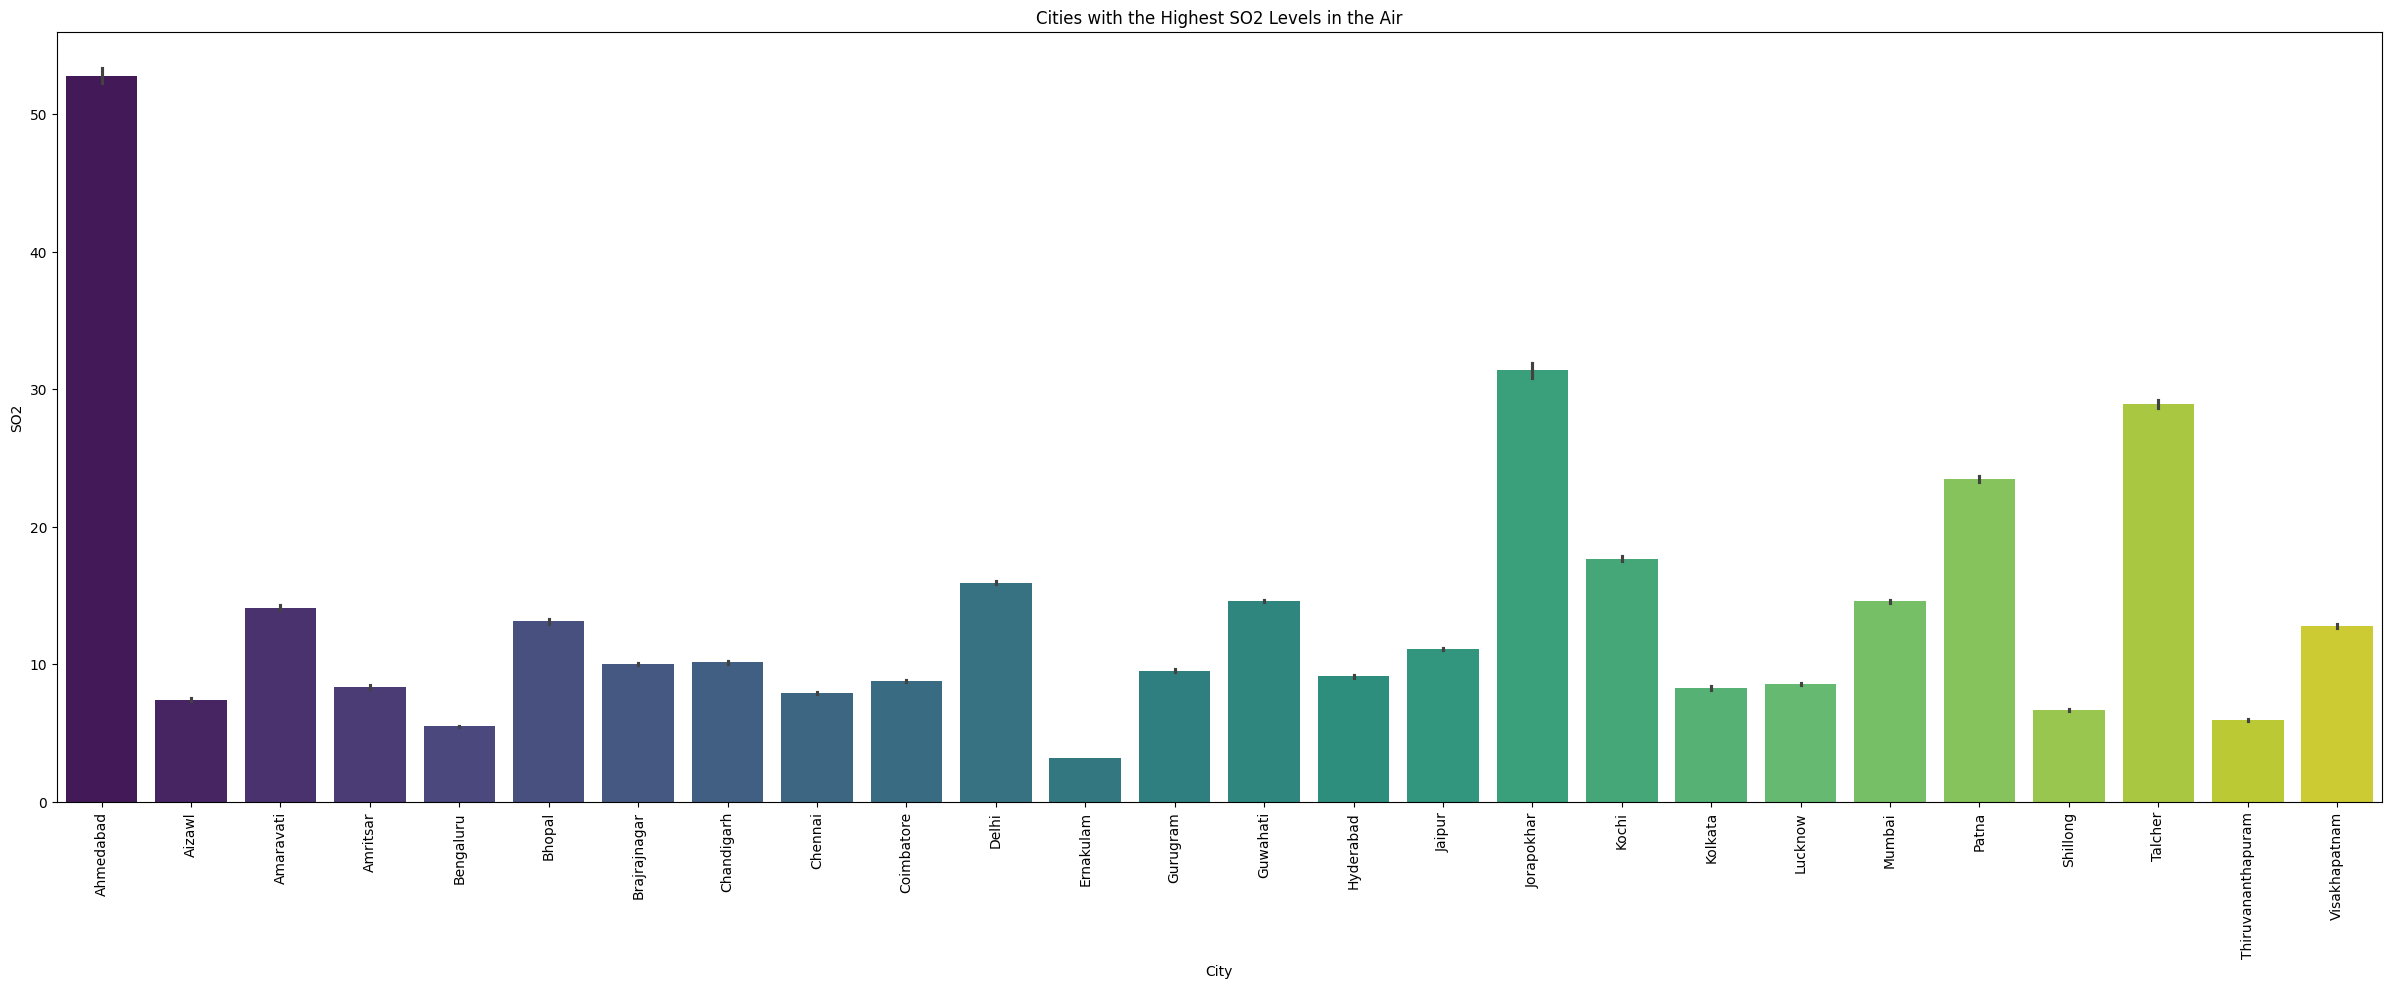

In [14]:
# This visualization shows the name of the state having higher so2 levels in the air
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='SO2', data=df, palette='viridis')
plt.title("Cities with the Highest SO2 Levels in the Air")
plt.show()


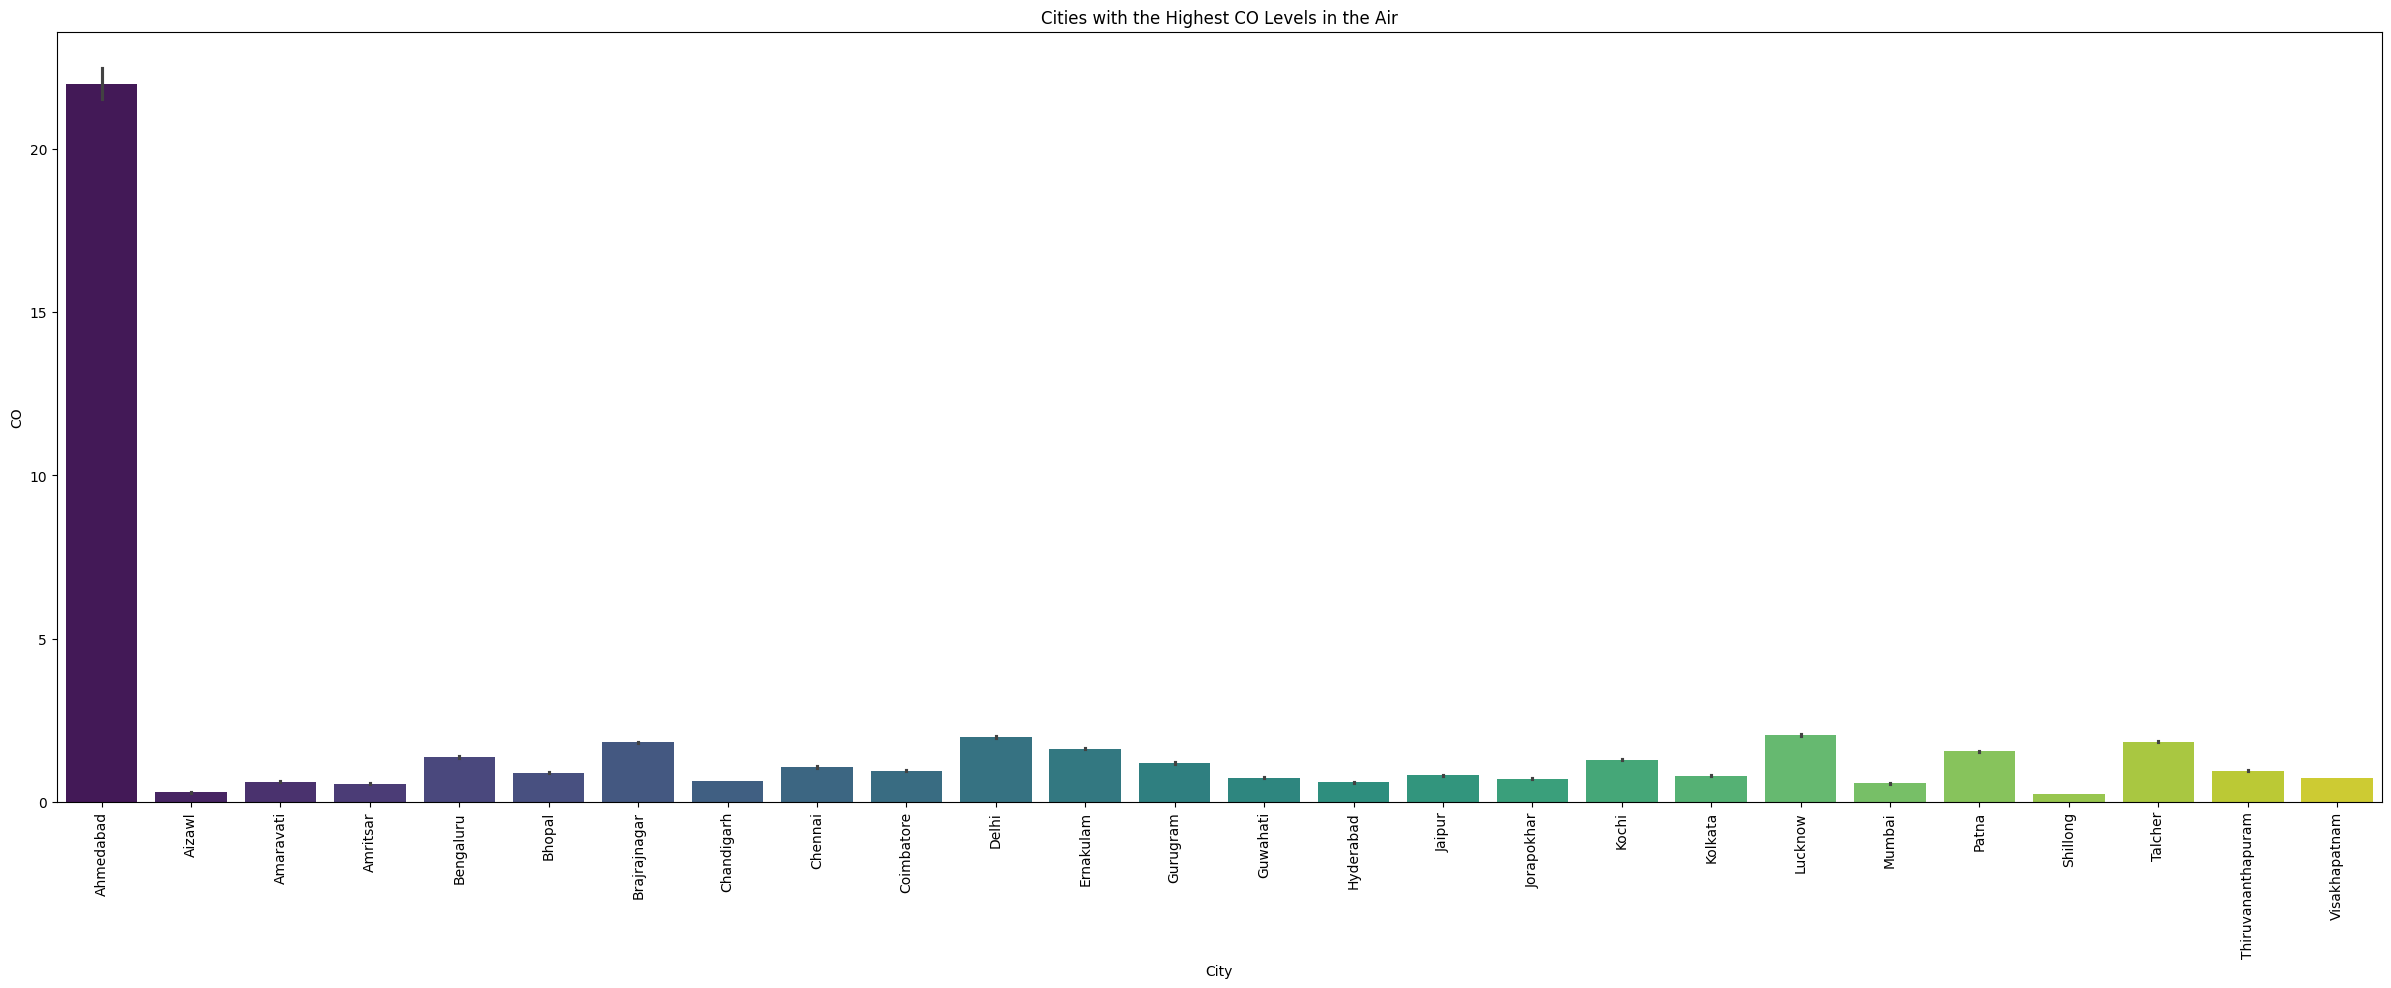

In [15]:
# This visualization shows the name of the state having higher CO levels in the air
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='CO', data=df, palette='viridis')
plt.title("Cities with the Highest CO Levels in the Air")
plt.show()



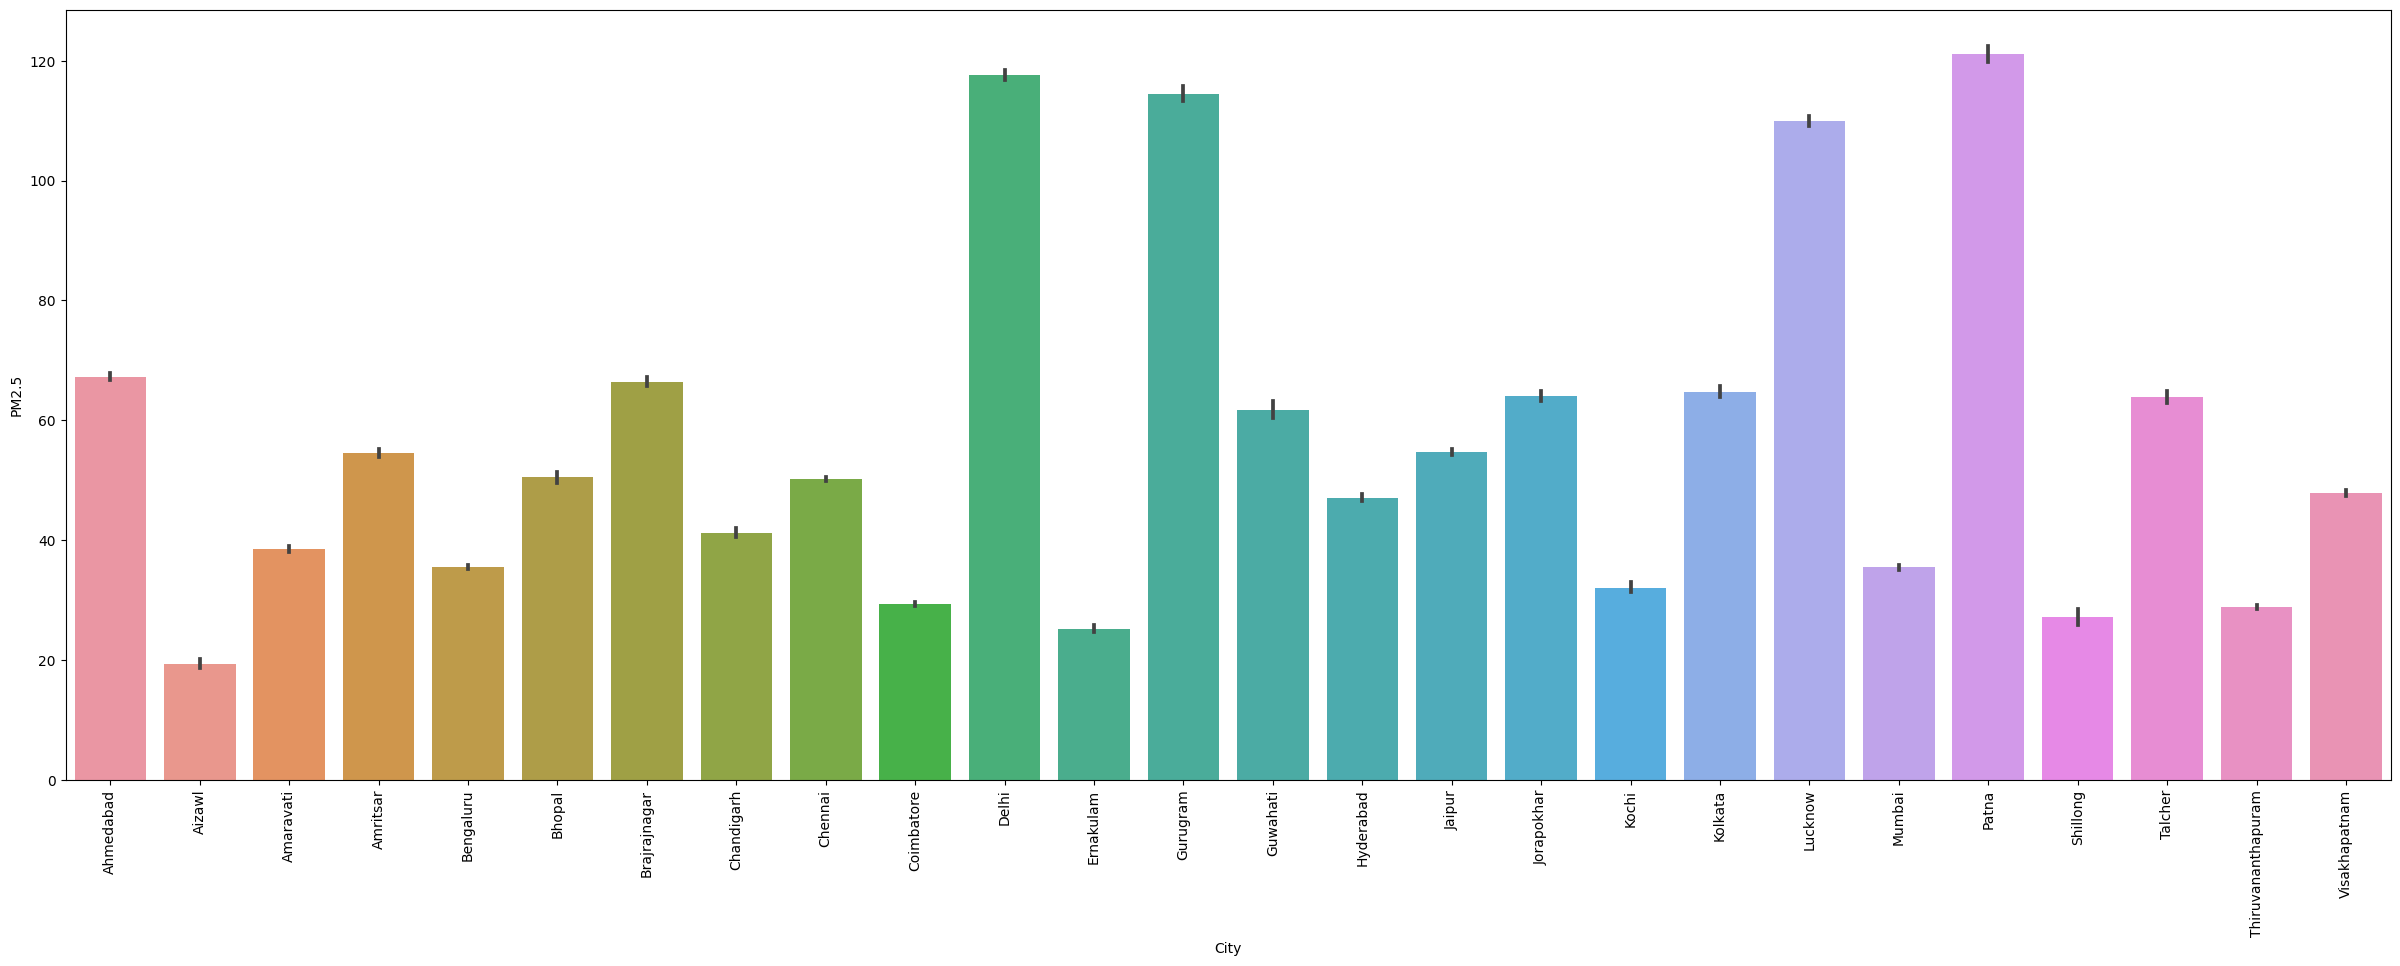

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='PM2.5',data=df);
# This visualization shows the name of the state having higher PM2.5 levels in the air

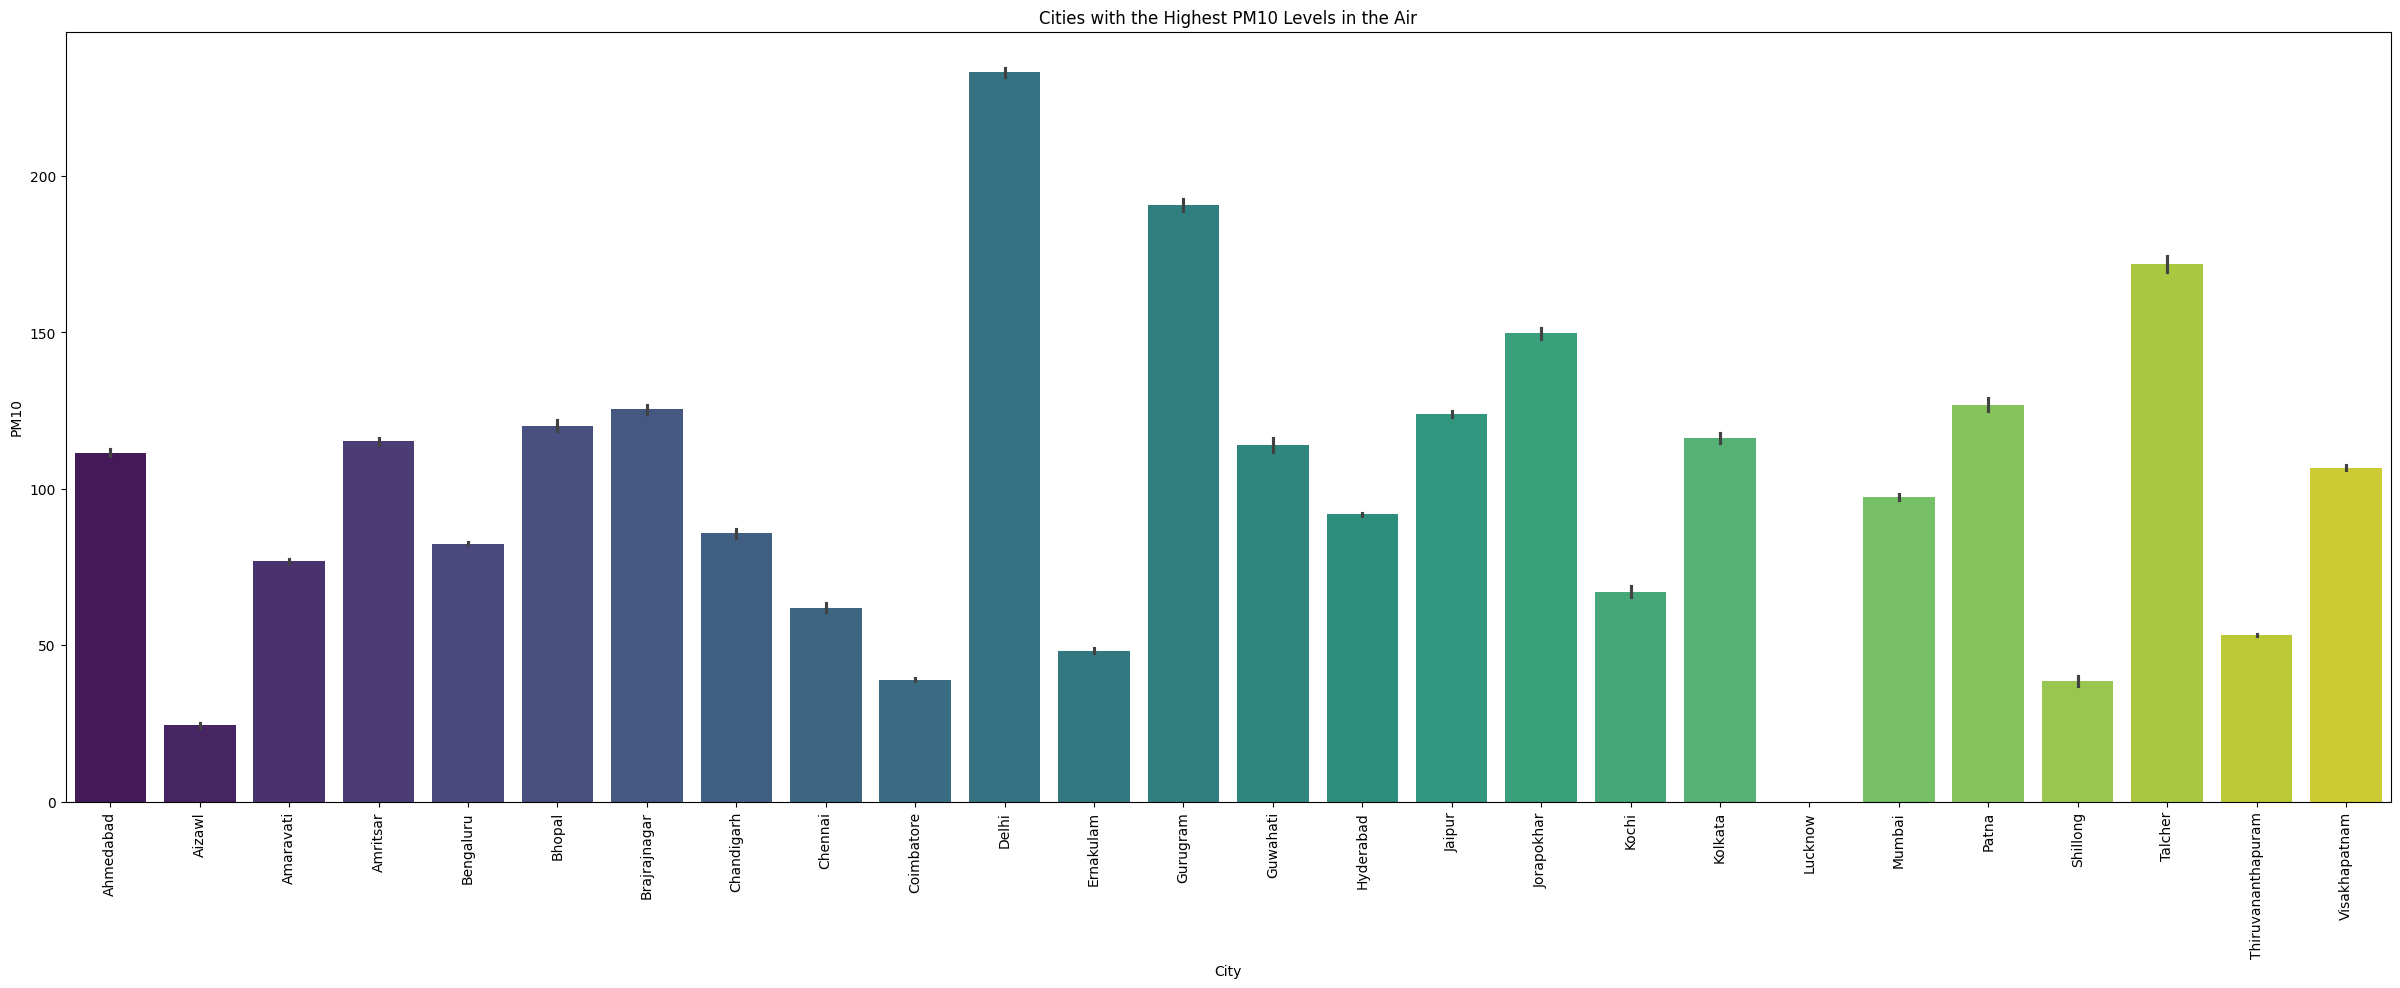

In [16]:
# This visualization shows the name of the state having higher PM10 levels in the air
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City', y='PM10', data=df, palette='viridis')
plt.title("Cities with the Highest PM10 Levels in the Air")
plt.show()


<Figure size 3000x1000 with 0 Axes>

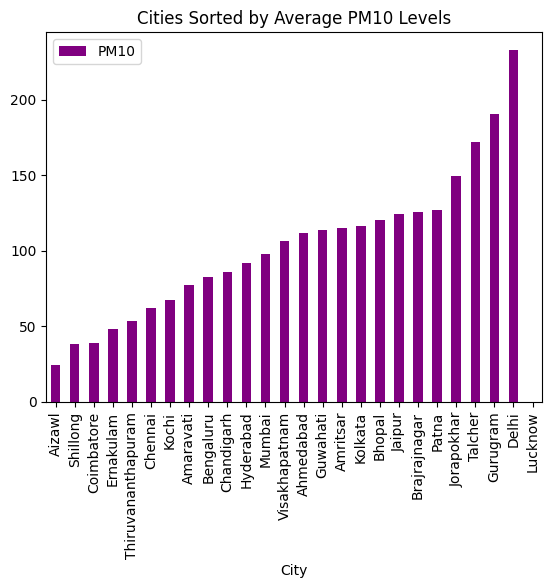

In [18]:
plt.figure(figsize=(30, 10))
df[['PM10', 'City']].groupby(["City"]).mean().sort_values(by='PM10').plot.bar(color='purple')
plt.title("Cities Sorted by Average PM10 Levels")
plt.show()

# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their PM10 levels.

## Remove the Unnessacary column

In [20]:
df.reset_index(inplace=True)
df.drop(columns=['Datetime'], inplace=True)
#Remove the 'index' column
df.drop(columns=['index'], inplace=True)
#droping unnessecary data(-_-)
df.drop(['Xylene'],axis=1,inplace=True)
df.drop(['Toluene'],axis=1,inplace=True)


In [22]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   PM2.5       562787 non-null  float64
 2   PM10        411138 non-null  float64
 3   NO          591243 non-null  float64
 4   NO2         590753 non-null  float64
 5   NOx         584651 non-null  float64
 6   NH3         435333 non-null  float64
 7   CO          621358 non-null  float64
 8   SO2         577502 non-null  float64
 9   O3          578667 non-null  float64
 10  Benzene     544229 non-null  float64
 11  AQI         578795 non-null  float64
 12  AQI_Bucket  578795 non-null  object 
dtypes: float64(11), object(2)
memory usage: 70.2+ MB


In [ ]:
df.head()

City  PM2.5  PM10    NO    NO2    NOx  NH3    CO     SO2      O3  \
0  Ahmedabad    NaN   NaN  1.00  40.01  36.37  NaN  1.00  122.07     NaN   
1  Ahmedabad    NaN   NaN  0.02  27.75  19.73  NaN  0.02   85.90     NaN   
2  Ahmedabad    NaN   NaN  0.08  19.32  11.08  NaN  0.08   52.83     NaN   
3  Ahmedabad    NaN   NaN  0.30  16.45   9.20  NaN  0.30   39.53  153.58   
4  Ahmedabad    NaN   NaN  0.12  14.90   7.85  NaN  0.12   32.63     NaN   

   Benzene  AQI AQI_Bucket  
0      0.0  NaN        NaN  
1      0.0  NaN        NaN  
2      0.0  NaN        NaN  
3      0.0  NaN        NaN  
4      0.0  NaN        NaN

In [ ]:
df.head()

City            Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad 2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad 2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad 2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad 2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad 2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  AQI AQI_Bucket  
0  122.07     NaN      0.0  NaN        NaN  
1   85.90     NaN      0.0  NaN        NaN  
2   52.83     NaN      0.0  NaN        NaN  
3   39.53  153.58      0.0  NaN        NaN  
4   32.63     NaN      0.0  NaN        NaN

In [ ]:
df.isnull().sum()

City               0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
AQI           129080
AQI_Bucket    129080
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the cities list
df['City'] = label_encoder.fit_transform(df['City'])


In [24]:
cities = df['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index([ 0, 10, 20,  4, 19,  8, 14, 21, 12, 25,  3, 16, 15, 24,  2,  6, 23, 18,
       13,  9, 22,  7,  5, 17, 11,  1],
      dtype='int64', name='City')


In [ ]:
df.describe()

PM2.5           PM10             NO            NO2  \
count  562787.000000  411138.000000  591243.000000  590753.000000   
mean       67.622994     119.075804      17.421755      28.885157   
std        74.730496     104.224752      32.095211      29.162194   
min         0.010000       0.010000       0.010000       0.010000   
25%        26.200000      52.380000       3.840000      10.810000   
50%        46.420000      91.500000       7.960000      20.320000   
75%        79.490000     147.520000      16.150000      36.350000   
max       999.990000    1000.000000     499.990000     499.510000   

                 NOx            NH3             CO            SO2  \
count  584651.000000  435333.000000  621358.000000  577502.000000   
mean       32.287565      23.607959       2.183539      14.038307   
std        39.756669      28.831900      10.970514      19.305540   
min         0.000000       0.010000       0.000000       0.010000   
25%        10.660000       8.120000       0.420000       4.880000   
50%        20.790000      15.380000       0.800000       8.370000   
75%        37.150000      29.230000       1.370000      14.780000   
max       498.610000     499.970000     498.570000     199.960000   

                  O3        Benzene            AQI  
count  578667.000000  544229.000000  578795.000000  
mean       34.798979       3.087595     166.413500  
std        29.806379      16.456599     162.112729  
min         0.010000       0.000000       8.000000  
25%        13.420000       0.050000      79.000000  
50%        26.240000       0.860000     116.000000  
75%        47.620000       2.750000     208.000000  
max       497.620000     498.070000    3133.000000

In [ ]:
df.head()

City  PM2.5  PM10    NO    NO2    NOx  NH3    CO     SO2      O3  Benzene  \
0     0    NaN   NaN  1.00  40.01  36.37  NaN  1.00  122.07     NaN      0.0   
1     0    NaN   NaN  0.02  27.75  19.73  NaN  0.02   85.90     NaN      0.0   
2     0    NaN   NaN  0.08  19.32  11.08  NaN  0.08   52.83     NaN      0.0   
3     0    NaN   NaN  0.30  16.45   9.20  NaN  0.30   39.53  153.58      0.0   
4     0    NaN   NaN  0.12  14.90   7.85  NaN  0.12   32.63     NaN      0.0   

   AQI AQI_Bucket      time        date  
0  NaN        NaN  01:00:00  2015-01-01  
1  NaN        NaN  02:00:00  2015-01-01  
2  NaN        NaN  03:00:00  2015-01-01  
3  NaN        NaN  04:00:00  2015-01-01  
4  NaN        NaN  05:00:00  2015-01-01

## Handling missing values

In [ ]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Reds')


Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


<Axes: >

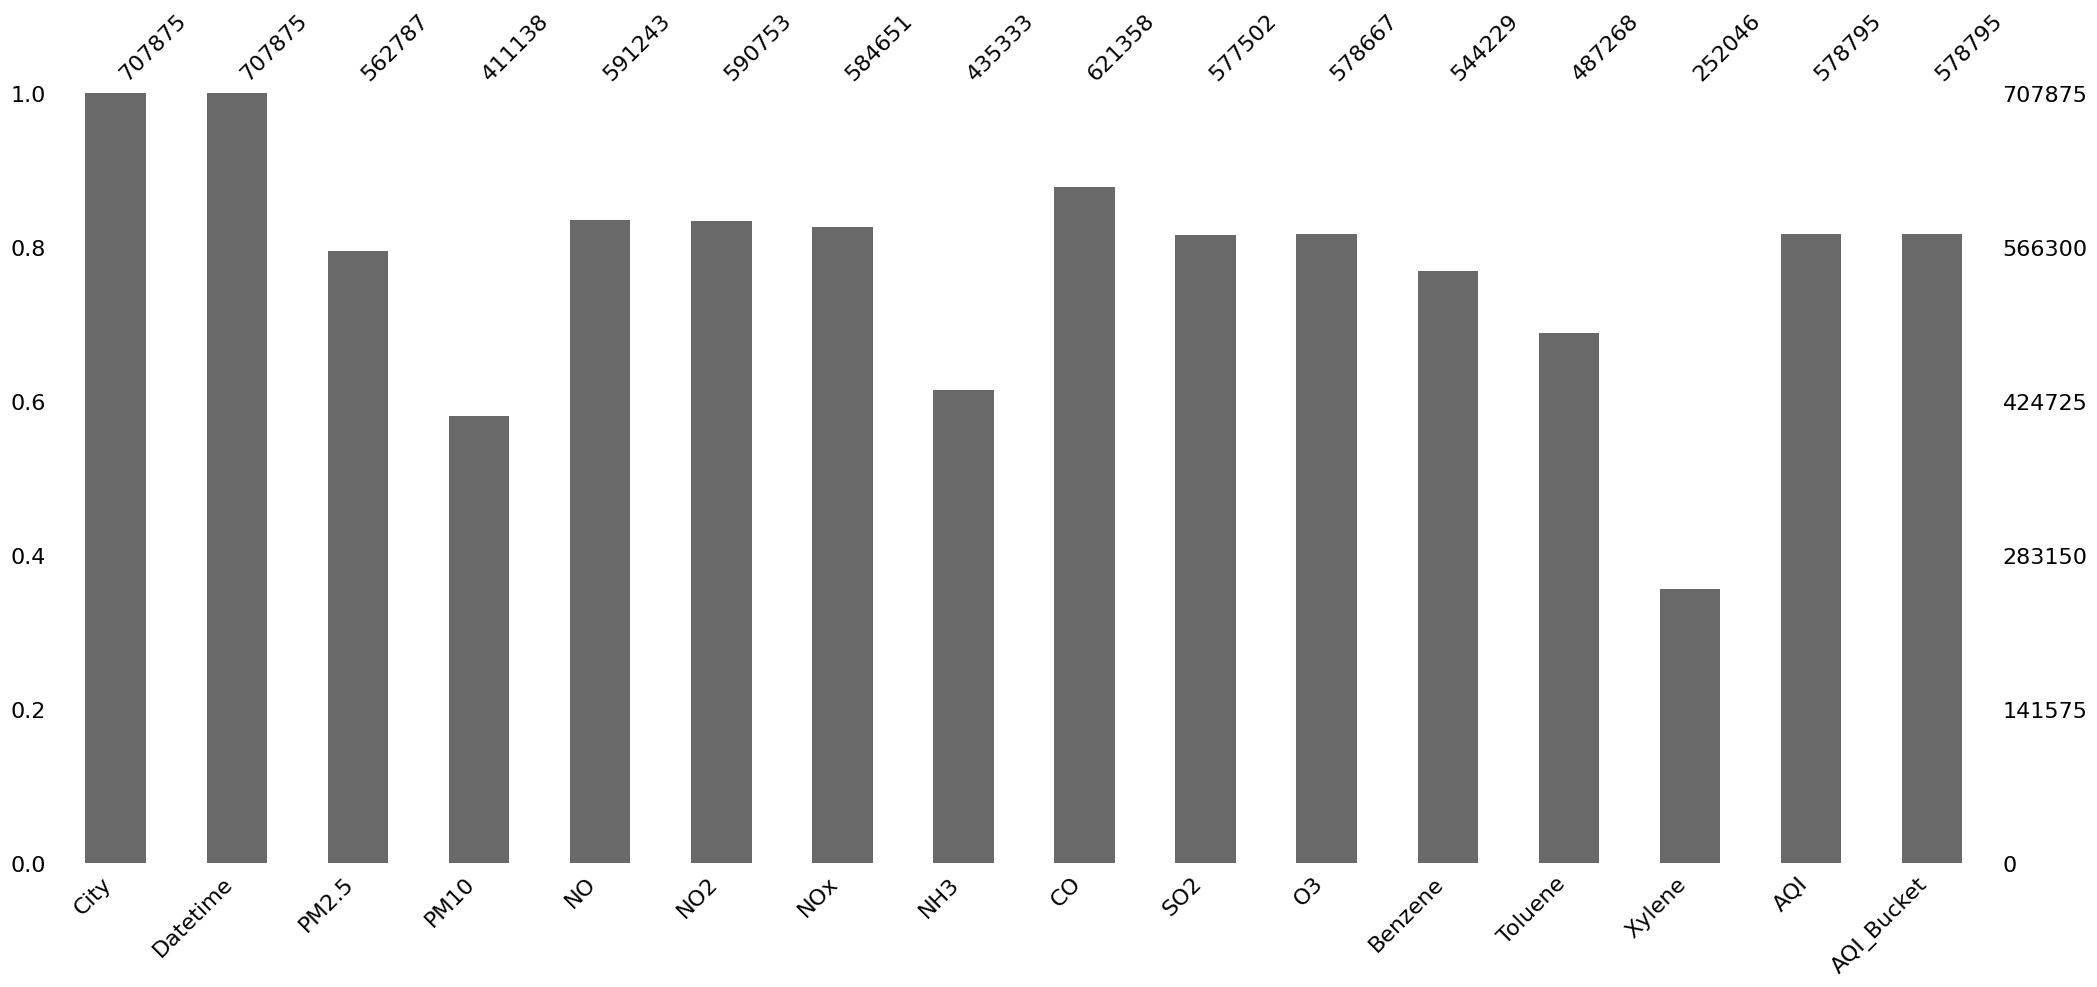

In [ ]:
import missingno as msno
msno.bar(df)

<Axes: >

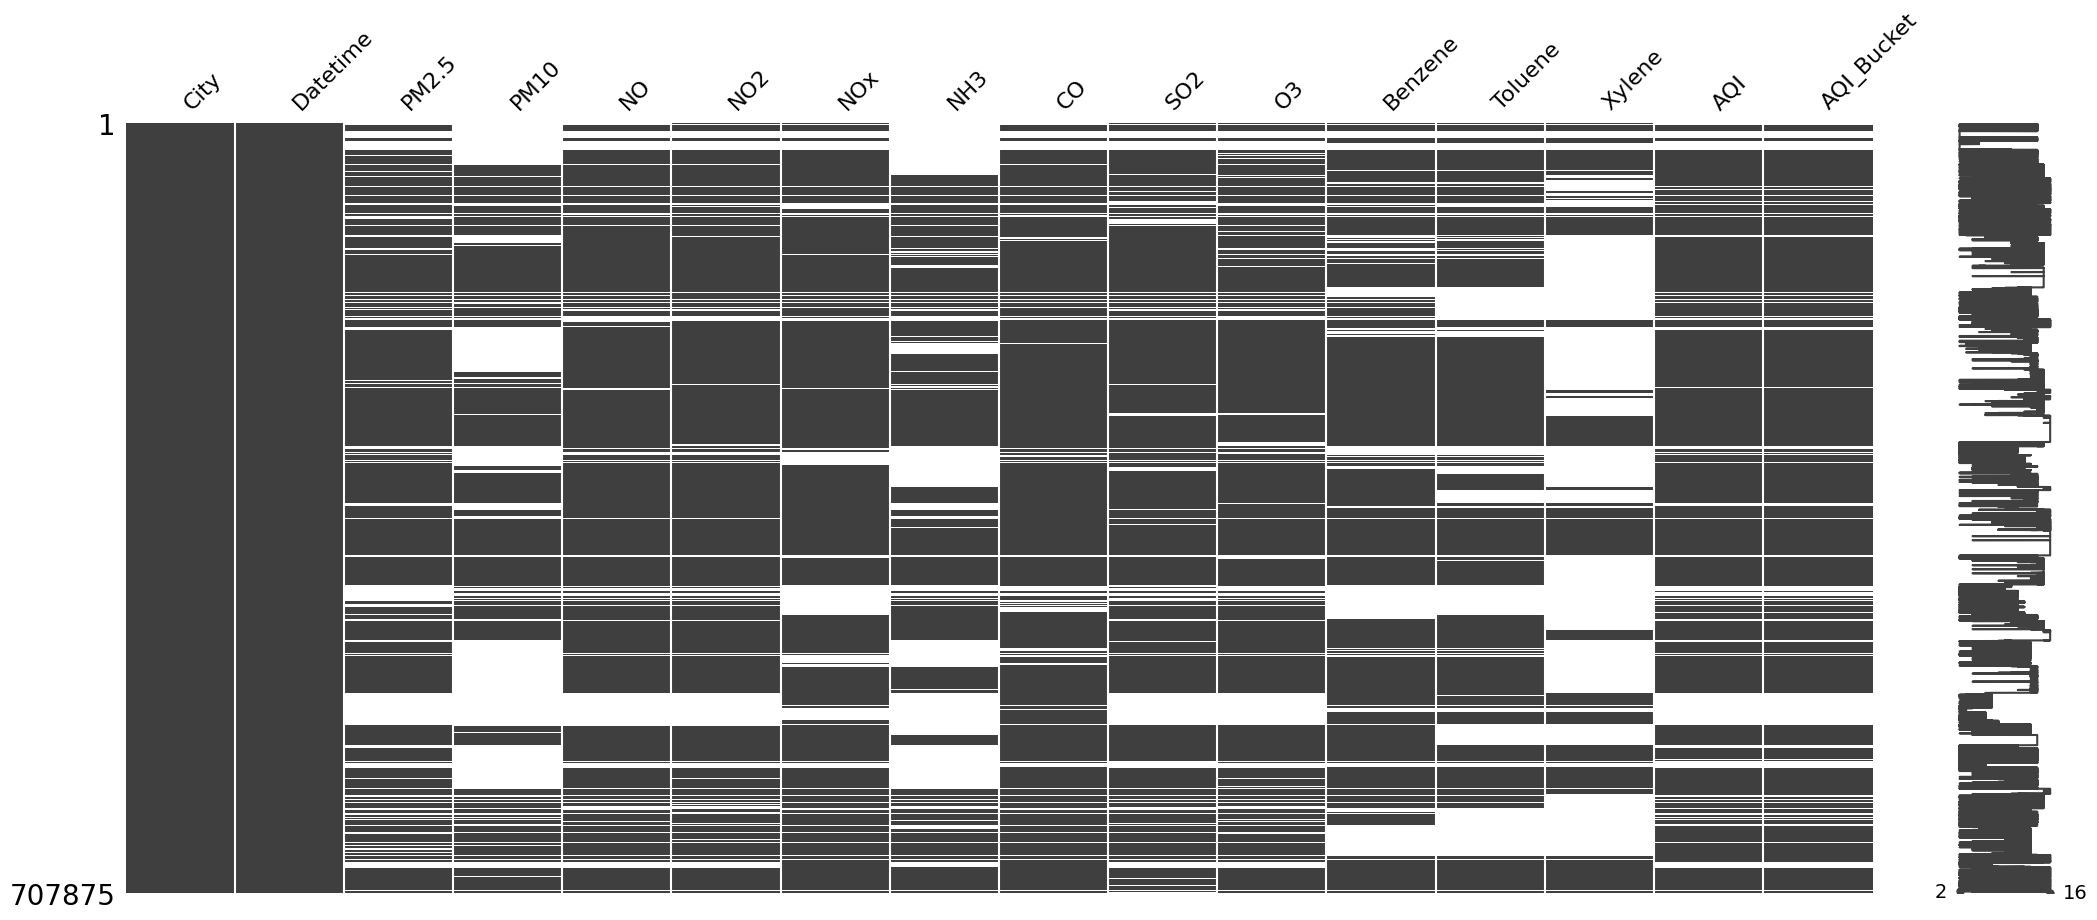

In [ ]:
msno.matrix(df)

<Axes: >

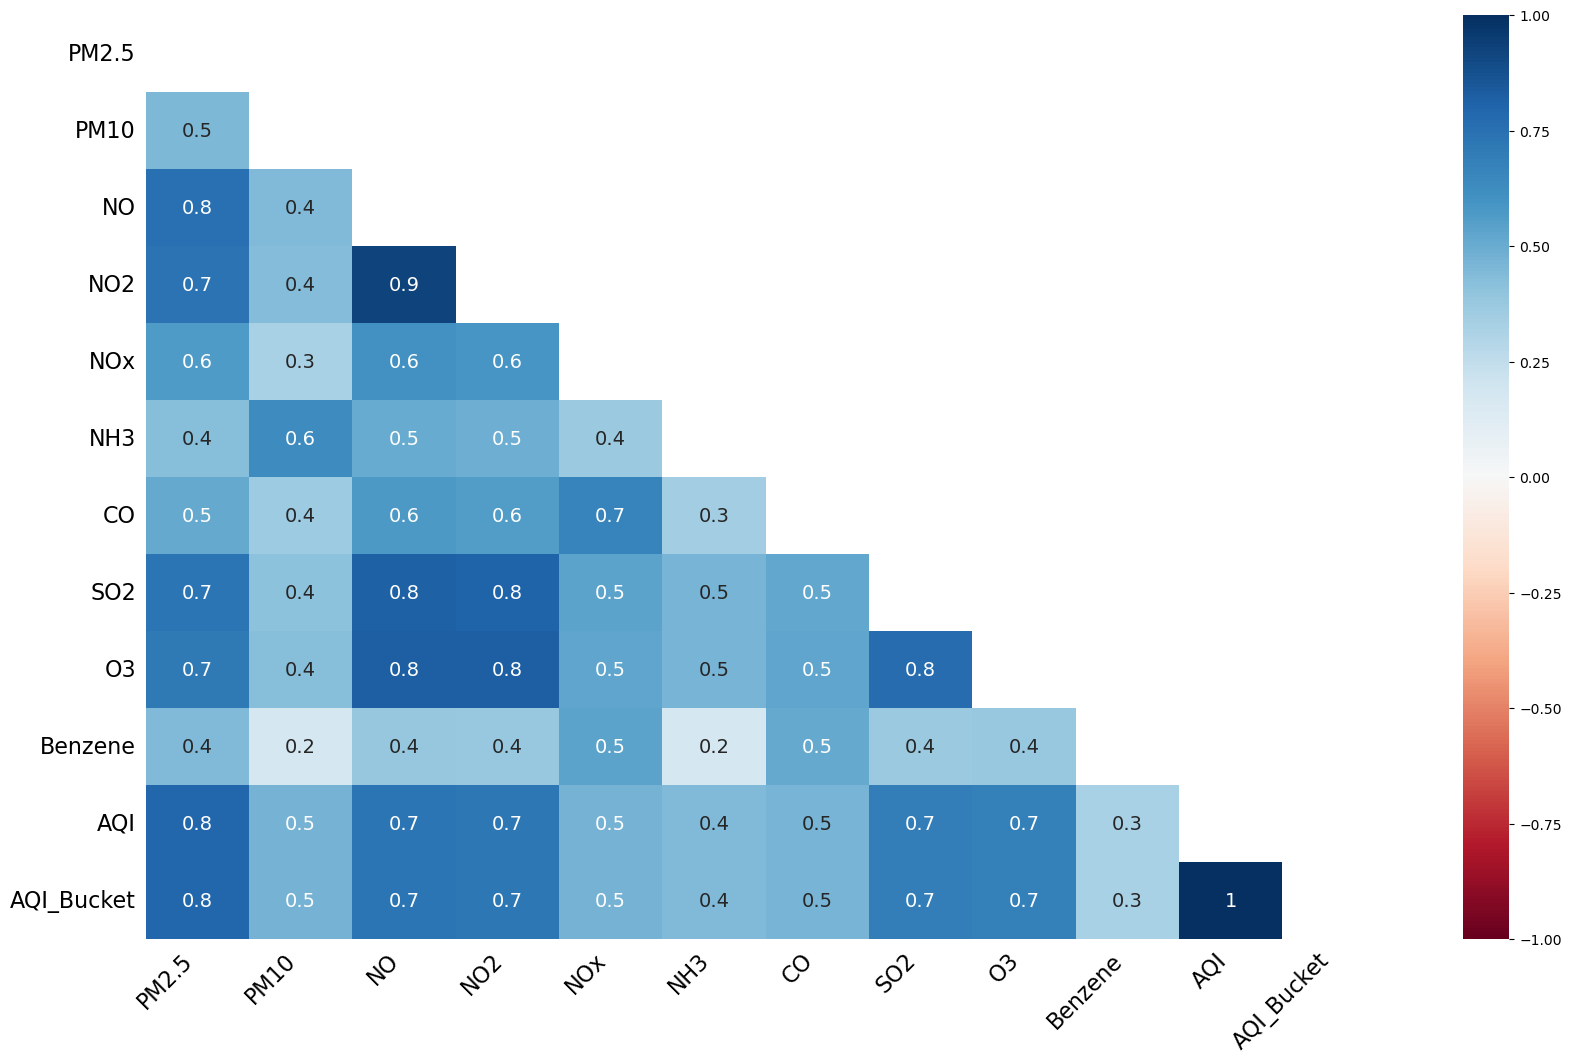

In [ ]:
msno.heatmap(df)

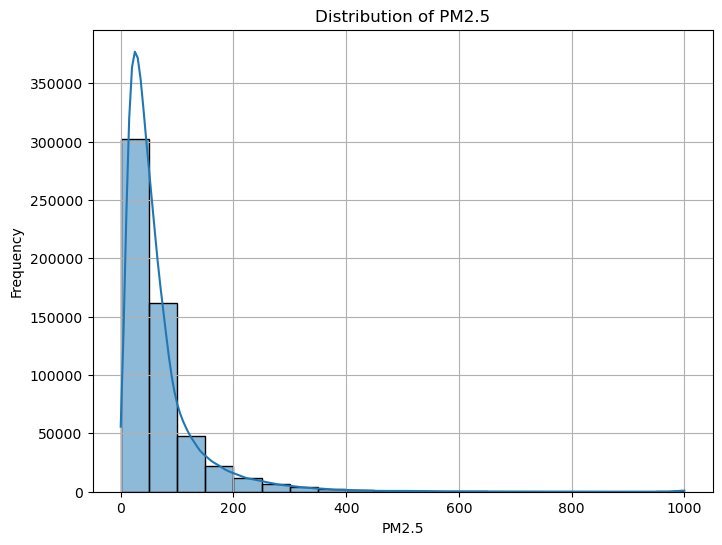

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['PM2.5'], bins=20, kde=True)
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

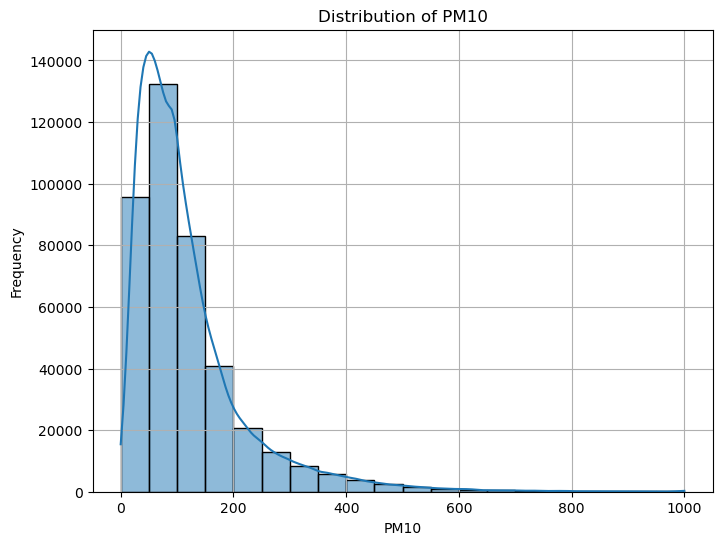

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['PM10'], bins=20, kde=True)
plt.title("Distribution of PM10")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

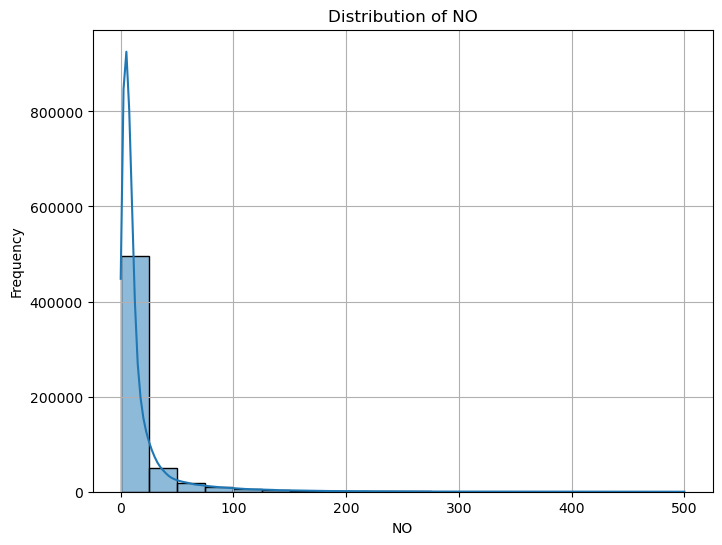

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['NO'], bins=20, kde=True)
plt.title("Distribution of NO")
plt.xlabel("NO")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

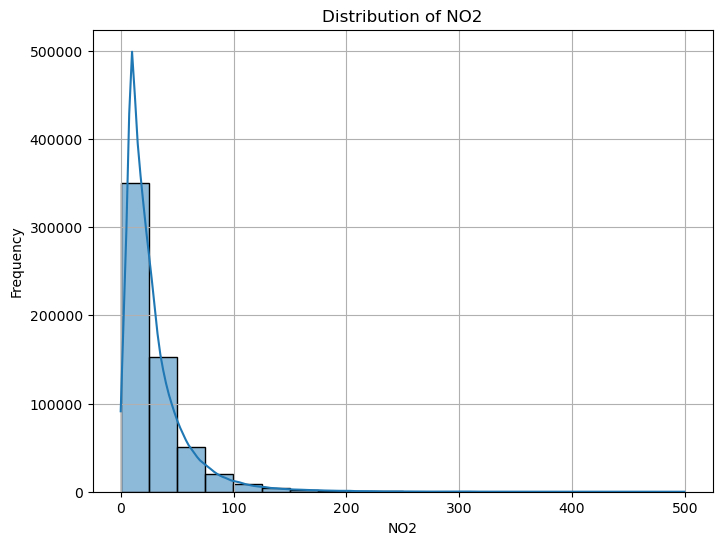

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['NO2'], bins=20, kde=True)
plt.title("Distribution of NO2")
plt.xlabel("NO2")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

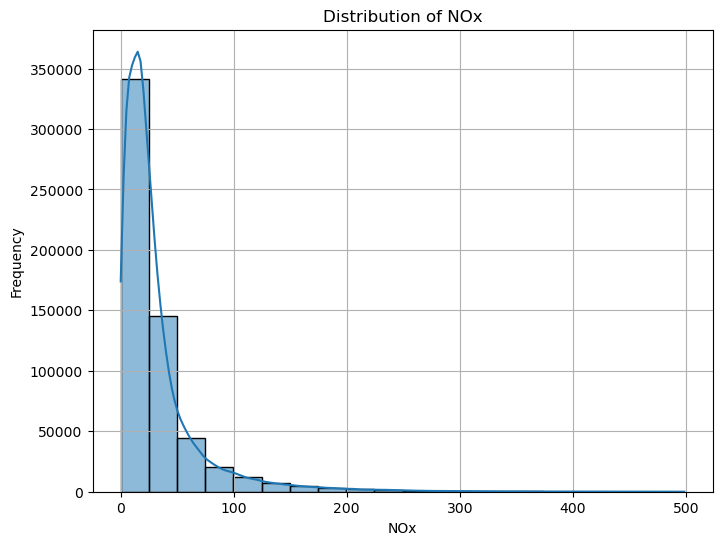

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['NOx'], bins=20, kde=True)
plt.title("Distribution of NOx")
plt.xlabel("NOx")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

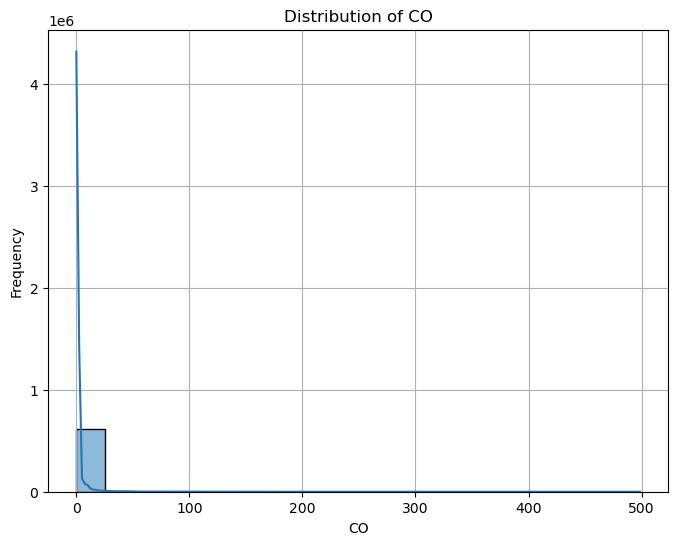

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['CO'], bins=20, kde=True)
plt.title("Distribution of CO")
plt.xlabel("CO")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

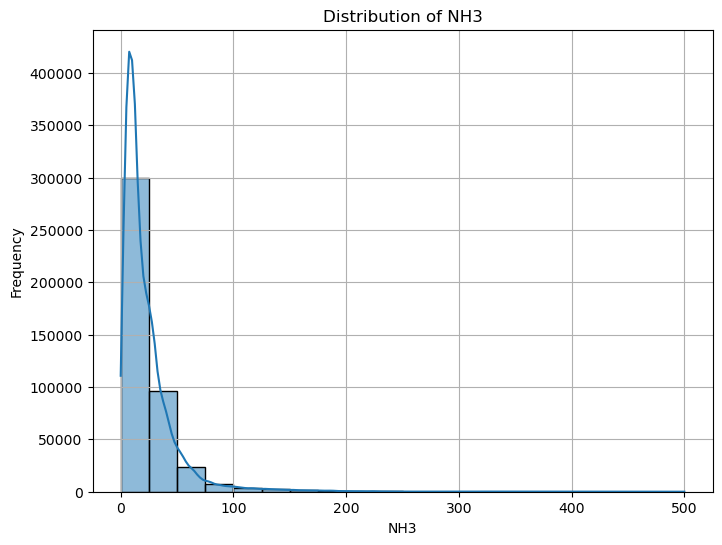

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['NH3'], bins=20, kde=True)
plt.title("Distribution of NH3")
plt.xlabel("NH3")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

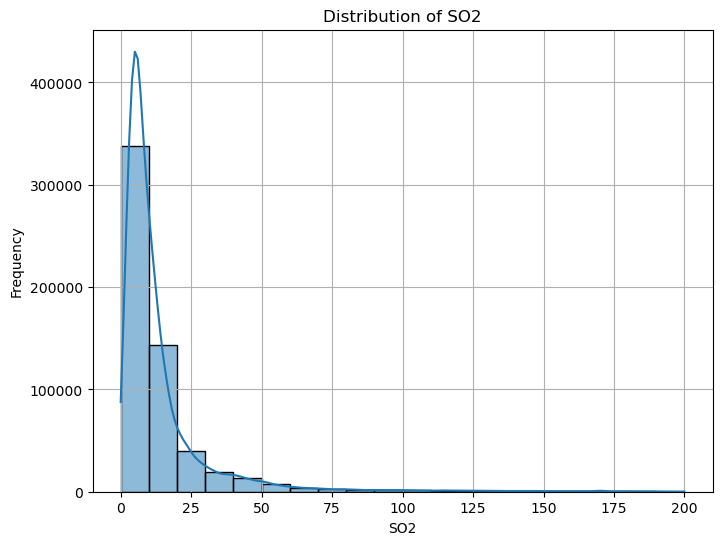

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['SO2'], bins=20, kde=True)
plt.title("Distribution of SO2")
plt.xlabel("SO2")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

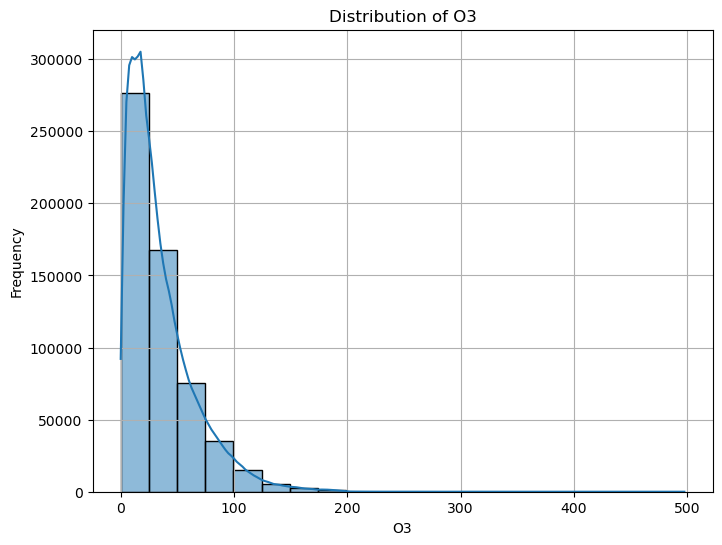

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['O3'], bins=20, kde=True)
plt.title("Distribution of O3")
plt.xlabel("O3")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

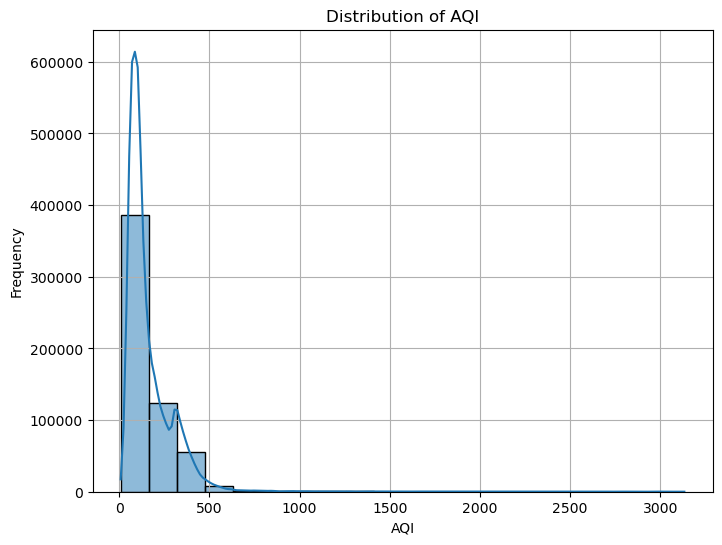

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['AQI'], bins=20, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

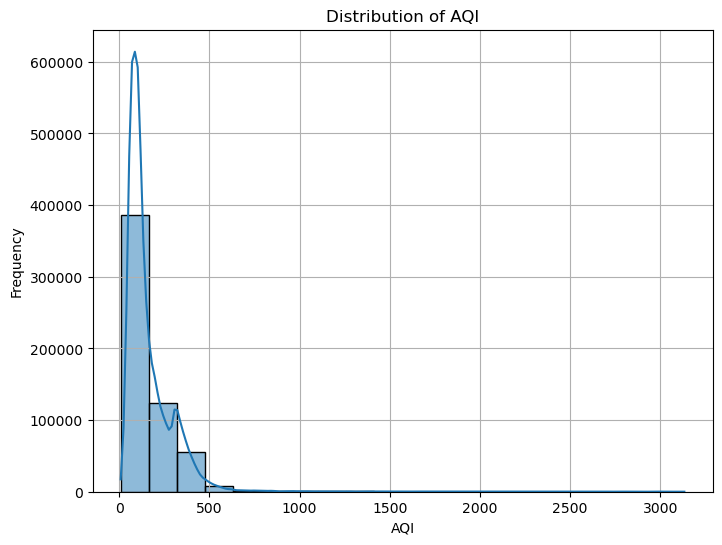

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['AQI'], bins=20, kde=True)
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

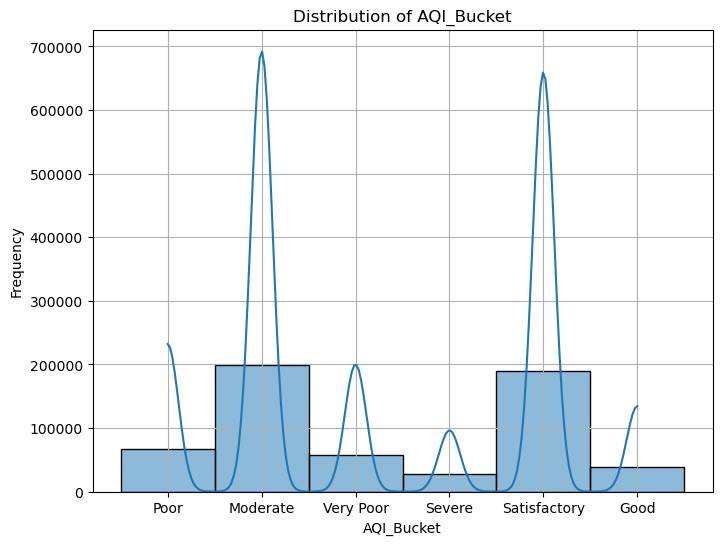

In [ ]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['AQI_Bucket'], bins=20, kde=True)
plt.title("Distribution of AQI_Bucket")
plt.xlabel("AQI_Bucket")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
df.isnull().sum()

City               0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
AQI           129080
AQI_Bucket    129080
dtype: int64

In [25]:
df12=df[['PM2.5','PM10','SO2','NOx','NH3','CO','O3']]

In [ ]:
df12.head()

PM2.5  PM10     SO2    NOx  NH3    CO      O3
0    NaN   NaN  122.07  36.37  NaN  1.00     NaN
1    NaN   NaN   85.90  19.73  NaN  0.02     NaN
2    NaN   NaN   52.83  11.08  NaN  0.08     NaN
3    NaN   NaN   39.53   9.20  NaN  0.30  153.58
4    NaN   NaN   32.63   7.85  NaN  0.12     NaN

### median imputation for ['PM2.5', 'PM10', 'SO2', 'NOx', 'NH3', 'CO', 'O3']

In [26]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NOx'].fillna(df['NOx'].median(), inplace=True)
df['NH3'].fillna(df['NH3'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['AQI'].fillna(df['AQI'].median(), inplace=True)



In [27]:
# Mode Imputation: filling NaN values in categorical data
df['AQI_Bucket'].fillna(df['AQI_Bucket'].mode()[0], inplace=True)


In [28]:
df.isnull().sum()

City               0
PM2.5              0
PM10               0
NO            116632
NO2           117122
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene       163646
AQI                0
AQI_Bucket         0
dtype: int64

### Function to calculate  individual pollutants index(PM2.5, PM10, SO2, NOx, NH3, CO and O3) Feature Engineering:

### ->The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
->For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.


->For CO and O3 the maximum value in last 8-hrs is used.

->Each measure is converted into a Sub-Index based on pre-defined groups.

->Sometimes measures are not available due to lack of measuring or lack of required data points.

->Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

## PM2.5 Sub-Index calculation
PM2.5 (Particulate Matter 2.5-micrometer)
PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [29]:

def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2_5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))
data= df[['PM2_5_SubIndex','PM2.5']]
data.head()

PM2_5_SubIndex  PM2.5
0       77.366667  46.42
1       77.366667  46.42
2       77.366667  46.42
3       77.366667  46.42
4       77.366667  46.42

## PM10 Sub-Index calculation
PM10 (Particulate Matter 10-micrometer)
PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [30]:

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))
data= df[['PM10_SubIndex','PM10']]
data.head()

PM10_SubIndex  PM10
0           91.5  91.5
1           91.5  91.5
2           91.5  91.5
3           91.5  91.5
4           91.5  91.5

## SO2 Sub-Index calculation
SO2 (Sulphur Dioxide)
SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [31]:

def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].apply(lambda x: get_SO2_subindex(x))
data= df[['SO2_SubIndex','SO2']]
data.head()

SO2_SubIndex     SO2
0    114.023333  122.07
1    101.966667   85.90
2     66.037500   52.83
3     49.412500   39.53
4     40.787500   32.63

## NOx Sub-Index calculation
NOx (Any Nitric x-oxide)
NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:

In [32]:

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))
data= df[['NOx_SubIndex','NOx']]
data.head()

NOx_SubIndex    NOx
0       45.4625  36.37
1       24.6625  19.73
2       13.8500  11.08
3       11.5000   9.20
4        9.8125   7.85

## NH3 Sub-Index calculation
NH3 (Ammonia)
NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:
    

In [33]:

def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].apply(lambda x: get_NH3_subindex(x))
data= df[['NH3_SubIndex','NH3']]
data.head()

NH3_SubIndex    NH3
0         3.845  15.38
1         3.845  15.38
2         3.845  15.38
3         3.845  15.38
4         3.845  15.38

## CO Sub-Index calculation
CO (Carbon Monoxide)
CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

In [34]:

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].apply(lambda x: get_CO_subindex(x))
data= df[['CO_SubIndex','CO']]
data.head()

CO_SubIndex    CO
0         50.0  1.00
1          1.0  0.02
2          4.0  0.08
3         15.0  0.30
4          6.0  0.12

## O3 Sub-Index calculation
O3 (Ozone or Trioxygen)
O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [35]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].apply(lambda x: get_O3_subindex(x))
data= df[['O3_SubIndex','O3']]
data.head()

O3_SubIndex      O3
0    26.240000   26.24
1    26.240000   26.24
2    26.240000   26.24
3   178.794118  153.58
4    26.240000   26.24

### function to calculate the air quality index (AQI) of every data value

AQI
The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

The pre-defined buckets of AQI are as follows:
![image.png](attachment:image.png)
    

In [36]:
def cal_aqi(PM2_5_SubIndex, PM10_SubIndex, SO2_SubIndex, NOx_SubIndex, NH3_SubIndex, CO_SubIndex, O3_SubIndex):
    aqi = 0  # Initialize AQI variable

    if (PM2_5_SubIndex > PM10_SubIndex and PM2_5_SubIndex > SO2_SubIndex and PM2_5_SubIndex > NOx_SubIndex
            and PM2_5_SubIndex > NH3_SubIndex and PM2_5_SubIndex > CO_SubIndex and PM2_5_SubIndex > O3_SubIndex):
        aqi = PM2_5_SubIndex
    if (PM10_SubIndex > PM2_5_SubIndex and PM10_SubIndex > SO2_SubIndex and PM10_SubIndex > NOx_SubIndex
            and PM10_SubIndex > NH3_SubIndex and PM10_SubIndex > CO_SubIndex and PM10_SubIndex > O3_SubIndex):
        aqi = PM10_SubIndex
    if (SO2_SubIndex > PM2_5_SubIndex and SO2_SubIndex > PM10_SubIndex and SO2_SubIndex > NOx_SubIndex
            and SO2_SubIndex > NH3_SubIndex and SO2_SubIndex > CO_SubIndex and SO2_SubIndex > O3_SubIndex):
        aqi = SO2_SubIndex
    if (NOx_SubIndex > PM2_5_SubIndex and NOx_SubIndex > PM10_SubIndex and NOx_SubIndex > SO2_SubIndex
            and NOx_SubIndex > NH3_SubIndex and NOx_SubIndex > CO_SubIndex and NOx_SubIndex > O3_SubIndex):
        aqi = NOx_SubIndex
    if (NH3_SubIndex > PM2_5_SubIndex and NH3_SubIndex > PM10_SubIndex and NH3_SubIndex > SO2_SubIndex
            and NH3_SubIndex > NOx_SubIndex and NH3_SubIndex > CO_SubIndex and NH3_SubIndex > O3_SubIndex):
        aqi = NH3_SubIndex
    if (CO_SubIndex > PM2_5_SubIndex and CO_SubIndex > PM10_SubIndex and CO_SubIndex > SO2_SubIndex
            and CO_SubIndex > NOx_SubIndex and CO_SubIndex > NH3_SubIndex and CO_SubIndex > O3_SubIndex):
        aqi = CO_SubIndex
    if (O3_SubIndex > PM2_5_SubIndex and O3_SubIndex > PM10_SubIndex and O3_SubIndex > SO2_SubIndex
            and O3_SubIndex > NOx_SubIndex and O3_SubIndex > NH3_SubIndex and O3_SubIndex > CO_SubIndex):
        aqi = O3_SubIndex
    return aqi
df['AQI_calculated'] = df.apply(lambda x: cal_aqi(x['PM2_5_SubIndex'], x['PM10_SubIndex'], x['SO2_SubIndex'],
                                              x['NOx_SubIndex'], x['NH3_SubIndex'], x['CO_SubIndex'], x['O3_SubIndex']),
                          axis=1)


In [37]:
df['AQI']

0         116.0
1         116.0
2         116.0
3         116.0
4         116.0
          ...  
707870     51.0
707871     51.0
707872     50.0
707873     50.0
707874     50.0
Name: AQI, Length: 707875, dtype: float64

In [38]:
df['AQI_calculated']

0         114.023333
1         101.966667
2          91.500000
3         178.794118
4          91.500000
             ...    
707870     36.000000
707871     49.250000
707872     71.000000
707873     63.000000
707874     66.000000
Name: AQI_calculated, Length: 707875, dtype: float64

In [39]:

## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# Calculate the number of pollutants contributing to the AQI
df["Checks"] = (df["PM2_5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

# Calculate the AQI based on sub-indices


# Set AQI_calculated to NaN for specific conditions
df['AQI_Range'] = df['AQI_calculated'].apply(get_AQI_bucket)


In [40]:
df.head()

City  PM2.5  PM10    NO    NO2    NOx    NH3    CO     SO2      O3  ...  \
0     0  46.42  91.5  1.00  40.01  36.37  15.38  1.00  122.07   26.24  ...   
1     0  46.42  91.5  0.02  27.75  19.73  15.38  0.02   85.90   26.24  ...   
2     0  46.42  91.5  0.08  19.32  11.08  15.38  0.08   52.83   26.24  ...   
3     0  46.42  91.5  0.30  16.45   9.20  15.38  0.30   39.53  153.58  ...   
4     0  46.42  91.5  0.12  14.90   7.85  15.38  0.12   32.63   26.24  ...   

   PM2_5_SubIndex  PM10_SubIndex SO2_SubIndex  NOx_SubIndex  NH3_SubIndex  \
0       77.366667           91.5   114.023333       45.4625         3.845   
1       77.366667           91.5   101.966667       24.6625         3.845   
2       77.366667           91.5    66.037500       13.8500         3.845   
3       77.366667           91.5    49.412500       11.5000         3.845   
4       77.366667           91.5    40.787500        9.8125         3.845   

   CO_SubIndex  O3_SubIndex  AQI_calculated  Checks     AQI_Range  
0         50.0    26.240000      114.023333       7      Moderate  
1          1.0    26.240000      101.966667       7      Moderate  
2          4.0    26.240000       91.500000       7  Satisfactory  
3         15.0   178.794118      178.794118       7      Moderate  
4          6.0    26.240000       91.500000       7  Satisfactory  

[5 rows x 23 columns]

## Splitting the dataset into Dependent and Independent columns


In [41]:
X=df[['PM2_5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex','NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex']]
Y=df['AQI_calculated']
Y1=df['AQI_Range']
X.head()


PM2_5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  NH3_SubIndex  \
0       77.366667           91.5    114.023333       45.4625         3.845   
1       77.366667           91.5    101.966667       24.6625         3.845   
2       77.366667           91.5     66.037500       13.8500         3.845   
3       77.366667           91.5     49.412500       11.5000         3.845   
4       77.366667           91.5     40.787500        9.8125         3.845   

   CO_SubIndex  O3_SubIndex  
0         50.0    26.240000  
1          1.0    26.240000  
2          4.0    26.240000  
3         15.0   178.794118  
4          6.0    26.240000

In [42]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'AQI', 'AQI_Bucket', 'PM2_5_SubIndex', 'PM10_SubIndex',
       'SO2_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex',
       'O3_SubIndex', 'AQI_calculated', 'Checks', 'AQI_Range'],
      dtype='object')

In [43]:
print(Y.head())
print(Y1.head())

0    114.023333
1    101.966667
2     91.500000
3    178.794118
4     91.500000
Name: AQI_calculated, dtype: float64
0        Moderate
1        Moderate
2    Satisfactory
3        Moderate
4    Satisfactory
Name: AQI_Range, dtype: object


In [44]:
print(X.head())

   PM2_5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  NH3_SubIndex  \
0       77.366667           91.5    114.023333       45.4625         3.845   
1       77.366667           91.5    101.966667       24.6625         3.845   
2       77.366667           91.5     66.037500       13.8500         3.845   
3       77.366667           91.5     49.412500       11.5000         3.845   
4       77.366667           91.5     40.787500        9.8125         3.845   

   CO_SubIndex  O3_SubIndex  
0         50.0    26.240000  
1          1.0    26.240000  
2          4.0    26.240000  
3         15.0   178.794118  
4          6.0    26.240000  


In [45]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(495512, 7) (212363, 7) (495512,) (212363,)


# **Regression Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared
r2 = r2_score(Y_test, y_pred)
print(f'R-squared (R2): {r2}')

# Calculate Explained Variance
explained_var = explained_variance_score(Y_test, y_pred)
print(f'Explained Variance: {explained_var}')


Root Mean Squared Error (RMSE): 37.87417174498258
R-squared (R2): 0.9113297250473383
Explained Variance: 0.9113303793373114


In [ ]:
from sklearn import metrics
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  37.561243718497145
RMSE TestData =  37.87417174498258
--------------------------------------------------
RSquared value on train: 0.9086943079419336
RSquared value on test: 0.9113297250473383


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

DT.fit(X_train,Y_train)

#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('--'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  1.052178203469164e-12
RMSE TestData =  2.704324839597328
----------------------------------------------------------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.999547926051112


### RandomForestRegressor

In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor().fit(X_train,Y_train)
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

# **Classification Algorithms**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
X=df[['PM2_5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex', 'NOx_SubIndex','NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex',]]
Y=df['AQI_calculated']
Y1=df['AQI_Range']
X.head()


PM2_5_SubIndex  PM10_SubIndex  SO2_SubIndex  NOx_SubIndex  NH3_SubIndex  \
0       77.366667           91.5    114.023333       45.4625         3.845   
1       77.366667           91.5    101.966667       24.6625         3.845   
2       77.366667           91.5     66.037500       13.8500         3.845   
3       77.366667           91.5     49.412500       11.5000         3.845   
4       77.366667           91.5     40.787500        9.8125         3.845   

   CO_SubIndex  O3_SubIndex  
0         50.0    26.240000  
1          1.0    26.240000  
2          4.0    26.240000  
3         15.0   178.794118  
4          6.0    26.240000

In [48]:
# Splitting the data into training and testing data
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y1, test_size=0.33, random_state=70)



# Logistic Regression

**1. Logistic Regression:**

**Formula:**

P(AQI_category) = 1 / (1 + exp(-β0 - β1 * X1 - β2 * X2 - ... - βn * Xn))

Where:
* P(AQI_category) is the probability of a data point belonging to a specific AQI category.
* β0 is the intercept coefficient.
* βi are the coefficient weights for each input feature (X1 to Xn).

**Error Calculation:**

* **Log-loss:** This is a common metric for logistic regression, and it penalizes the model for incorrect predictions and the confidence of those predictions.


In [49]:
#fit the model on train data
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))
print('-'*50)

Model accuracy on train is:  0.5700899897949717
Model accuracy on test is:  0.5707173403995737
--------------------------------------------------
KappaScore is:  0.32408069025427677
--------------------------------------------------


In [50]:
#logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Train the logistic regression model
log_reg = LogisticRegression().fit(X_train2, Y_train2)

# Make predictions on the training data
train_preds2 = log_reg.predict(X_train2)

# Make predictions on the test data
test_preds2 = log_reg.predict(X_test2)

# Check if the lengths of Y_test2 and train_preds2 are equal
if len(Y_test2) != len(train_preds2):
    print("Error: The lengths of Y_test2 and train_preds2 are not equal.")
    print("Y_test2 length:", len(Y_test2))
    print("train_preds2 length:", len(train_preds2))
    exit(1)

# Calculate the accuracy on the test set
accuracy = accuracy_score(Y_test2, test_preds2)
print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test2, test_preds2)
print("Confusion Matrix:")
print(conf_matrix)
print("-" * 50)

# Calculate the classification report
class_report = classification_report(Y_test2, test_preds2)
print("Classification Report:")
print(class_report)


Error: The lengths of Y_test2 and train_preds2 are not equal.
Y_test2 length: 233599
train_preds2 length: 474276
Accuracy: 0.5707173403995737
Confusion Matrix:
[[   283     26     12  17550     17     14]
 [   216  16205   1073  35831   1856   5848]
 [   115   5122   1272   2479   1413   6991]
 [   399   3878    824 101407    887   1123]
 [     2   1659     62    995   2116   3750]
 [     9   4235    989    665   2240  12036]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

        Good       0.28      0.02      0.03     17902
    Moderate       0.52      0.27      0.35     61029
        Poor       0.30      0.07      0.12     17392
Satisfactory       0.64      0.93      0.76    108518
      Severe       0.25      0.25      0.25      8584
   Very Poor       0.40      0.60      0.48     20174

    accuracy                           0.57    233599
   macro avg       0.40      0.36      0.33    233599
weighte

# Decision Tree Classifier

In [51]:
#fitting the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))
print('-'*50)
#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
--------------------------------------------------
Model accuracy on test is:  0.9995333884134778
--------------------------------------------------
KappaScore is:  0.9993293109707307


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
# Predictions from your model
predictions = DT2.predict(X_test2)

# Accuracy on the test set
accuracy = accuracy_score(Y_test2, predictions)
print("Accuracy: ", accuracy)
print('-'*50)
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test2, predictions)
print("Confusion Matrix:\n", conf_matrix)
print("\n\n")
print('-'*50)
class_report = classification_report(Y_test2, predictions)
print("Classification Report:\n", class_report)

Accuracy:  0.9995462309342078
--------------------------------------------------
Confusion Matrix:
 [[ 17862     11      0     29      0      0]
 [     7  61020      0      2      0      0]
 [     0      5  17382      0      0      5]
 [    37      1      0 108480      0      0]
 [     0      0      0      0   8583      1]
 [     1      0      5      0      2  20166]]



--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00     17902
    Moderate       1.00      1.00      1.00     61029
        Poor       1.00      1.00      1.00     17392
Satisfactory       1.00      1.00      1.00    108518
      Severe       1.00      1.00      1.00      8584
   Very Poor       1.00      1.00      1.00     20174

    accuracy                           1.00    233599
   macro avg       1.00      1.00      1.00    233599
weighted avg       1.00      1.00      1.00    233599



In [ ]:
DT2.predict([[50,47.7,78.18,10,20,1.0,20]])

array(['Satisfactory'], dtype=object)

# Random Forest Classifier

In [ ]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))
print('-'*50)
#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
--------------------------------------------------
Model accuracy on test is:  0.999601881857371
--------------------------------------------------
KappaScore is:  0.999427684321819


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
# Predictions from your model
#predictions = DT2.predict(X_test2)
test_preds4 = RF.predict(X_test2)
# Accuracy on the test set
accuracy = accuracy_score(Y_test2, test_preds4)
print("Accuracy: ", accuracy)
print('-'*50)
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test2, test_preds4)
print("Confusion Matrix:\n", conf_matrix)
print("--"*50)
class_report = classification_report(Y_test2, test_preds4)
print("Classification Report:\n", class_report)

Accuracy:  0.9996318477390742
--------------------------------------------------
Confusion Matrix:
 [[ 17849     11      0     42      0      0]
 [     0  61028      0      1      0      0]
 [     0      6  17385      0      0      1]
 [     2      0      0 108516      0      0]
 [     0      0      0      0   8574     10]
 [     0      0     10      0      3  20161]]
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00     17902
    Moderate       1.00      1.00      1.00     61029
        Poor       1.00      1.00      1.00     17392
Satisfactory       1.00      1.00      1.00    108518
      Severe       1.00      1.00      1.00      8584
   Very Poor       1.00      1.00      1.00     20174

    accuracy                           1.00    233599
   macro avg       1.00      1.00      1.00    233599
weighted avg    

# K-Nearest Neighbours

In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))
print('-'*50)
#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions on the training set
train_preds5 = KNN.predict(X_train2)

# Accuracy on the training set
accuracy = accuracy_score(Y_train2, train_preds5)
print("Accuracy on train: ", accuracy)
print("--"*50)
# Predictions on the test set
test_preds5 = KNN.predict(X_test2)
print("--"*50)
# Accuracy on the test set
accuracy_test = accuracy_score(Y_test2, test_preds5)
print("Accuracy on test: ", accuracy_test)
print("--"*50)
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test2, test_preds5)
print("Confusion Matrix:\n", conf_matrix)
print("--"*50)
class_report = classification_report(Y_test2, test_preds5)
print("Classification Report:\n", class_report)

Accuracy on train:  0.9851774072481002
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Accuracy on test:  0.9752310583521333
----------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[ 17304     12      0    586      0      0]
 [     0  59428    321   1280      0      0]
 [     0    663  16067      0      0    662]
 [   642   1012      0 106864      0      0]
 [     0      0      0      0   8309    275]
 [     0      0    189      0    144  19841]]
----------------------------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

        Good       0.96      0.97      0.97     17902
    Moderate       0.97      0.97      0.97     61029
        Poor       0.97      0.92      0.9

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Create and train the SVM model
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X_train2,Y_train2)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("-" * 50)
# Print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)
print("-" * 50)

# Print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report)

kernel='rbf' sets the kernel type to radial basis function (RBF).
This is a popular kernel type for SVMs, and it is often effective for classification tasks.
gamma='auto' sets the gamma parameter to auto.
This means that the gamma parameter will be automatically determined based on the characteristics of the data.

# BULIDING INTERFACE

In [ ]:
import pickle

In [56]:
import pickle
from sklearn.tree import DecisionTreeClassifier

#  DT2 is your trained Decision Tree model
# Saveing the trained Decision Tree model to a pickle file
with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(DT2, model_file)


In [ ]:
import gradio as gr

In [ ]:
def make_prediction(PM2_5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex, CO_SubIndex,O3_SubIndex):
    with open("decision_tree_model.pkl", "rb") as f:
        DT2  = pickle.load(f)
        preds = DT2.predict([[PM2_5_SubIndex, PM10_SubIndex, SO2_SubIndex, NOx_SubIndex,NH3_SubIndex, CO_SubIndex, O3_SubIndex]])
    #if preds == 1:
          #  return "you have Diabites"
    return preds
#City_input = gr.Number(label = "Enter the City")
PM2_5_input = gr.Number(label = "Enter the PM2.5")
PM10_input = gr.Number(label = "Enter the PM10")
SO2_input = gr.Number(label = "Enter the SO2")
NOx_input = gr.Number(label = "Enter the NOx")
NH3_input = gr.Number(label = "Enter the NH3")
CO_input = gr.Number(label = "Enter the CO")
O3_input = gr.Number(label = "Enter the O3")
# We create the output
output = gr.Textbox()

heading = gr.Label(value="AQI PREDICTION")


app = gr.Interface(fn = make_prediction, inputs=[PM2_5_input,PM10_input,SO2_input,NOx_input,NH3_input,
                                                 CO_input,O3_input],
                                            outputs=output,
                                            examples=[[50,47.7,78.18,10,20,1.0,20],
                                                     [20.0, 30.0, 5.0, 10.0, 1.0, 0.1, 15.0],
                                                     [200,405.800,307,132,1.0,20,60],
                                                     [77.3,91.5,114.00,45.4,3.8,50.0,26.24]],
                                            #live=True,
                                            flagging_options=['YES','NO','MAYBE'],
                                            description="AQI PREDICTION USING CLASSIFICATION"
                                           )

app.launch(debug=True)
#KNN.predict([[7.4,47.7,78.18,10]])

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://515a5820869a2cc371.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Using KNN imputer for filling missing values (Optional/not neccessary)

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Create a DataFrame
df121= pd.DataFrame(df12)

# Initialize the KNNImputer with the desired number of neighbors (replace n_neighbors with your desired value)
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
imputed_data = imputer.fit_transform(df121)

# Convert the result back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=df121.columns)

# Display the original and imputed DataFrames
print("Original DataFrame:")
print(df121)
print("\nImputed DataFrame:")
print(df_imputed)
